# Analyse de base des fichiers éducation nationale. 
Objectif : voir les données, trouvé des pistes pour comprendre l'echec scolaire.

In [1]:
# import bibliothéques d'analyse de python
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np

import fonctions.perso_stats as perso_stats


In [2]:
college_resultat = pd.read_csv("donnee/fr-en-indicateurs-valeur-ajoutee-colleges.csv",sep=";")
collegue_stat = pd.read_csv("donnee/fr-en-ips-colleges-ap2022.csv",sep=";")
effectif_colleges = pd.read_csv("donnee/fr-en-college-effectifs-niveau-sexe-lv.csv",sep=";")

## Affichage des entêtes des données

In [3]:
effectif_colleges.head(1)

,rentree_scolaire,region_academique,academie,departement,commune,numero_college,denomination_principale,patronyme,secteur,rep,...,3eme_lv1_allemand,3eme_lv1_anglais,3eme_lv1_espagnol,3eme_lv1_autres,3eme_lv2_allemand,3eme_lv2_anglais,3eme_lv2_espagnol,3eme_lv2_italien,3eme_lv2_autres,code_postal
0,2019,AUVERGNE-ET-RHONE-ALPES,LYON,RHONE,VILLEURBANNE,0691664J,COLLEGE,JEAN JAURES,PUBLIC,1,...,0,175,0,0,26,0,131,14,0,69100.0


In [4]:
effectif_colleges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32982 entries, 0 to 32981
Data columns (total 76 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   rentree_scolaire                          32982 non-null  int64  
 1   region_academique                         32982 non-null  object 
 2   academie                                  32982 non-null  object 
 3   departement                               32982 non-null  object 
 4   commune                                   32982 non-null  object 
 5   numero_college                            32982 non-null  object 
 6   denomination_principale                   32982 non-null  object 
 7   patronyme                                 32927 non-null  object 
 8   secteur                                   32982 non-null  object 
 9   rep                                       32982 non-null  int64  
 10  rep_plus                          

In [5]:
collegue_stat.head(1)

,rentree_scolaire,academie,code_du_departement,departement,uai,nom_de_l_etablissment,code_insee_de_la_commune,nom_de_la_commune,secteur,effectifs,ips,ecart_type_de_l_ips
0,2022-2023,LYON,001,AIN,0010026Y,COLLEGE PAUL CLAUDEL,01202,LAGNIEU,public,777.0,111.1,32.8


In [6]:
collegue_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6973 entries, 0 to 6972
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   rentree_scolaire          6973 non-null   object 
 1   academie                  6973 non-null   object 
 2   code_du_departement       6973 non-null   object 
 3   departement               6973 non-null   object 
 4   uai                       6973 non-null   object 
 5   nom_de_l_etablissment     6973 non-null   object 
 6   code_insee_de_la_commune  6973 non-null   object 
 7   nom_de_la_commune         6973 non-null   object 
 8   secteur                   6973 non-null   object 
 9   effectifs                 6973 non-null   float64
 10  ips                       6973 non-null   float64
 11  ecart_type_de_l_ips       6973 non-null   float64
dtypes: float64(3), object(9)
memory usage: 653.8+ KB


In [7]:
college_resultat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13237 entries, 0 to 13236
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   session                             13237 non-null  int64  
 1   uai                                 13237 non-null  object 
 2   nom_de_l_etablissement              13237 non-null  object 
 3   commune                             13237 non-null  object 
 4   departement                         13237 non-null  object 
 5   academie                            13237 non-null  object 
 6   secteur                             13237 non-null  object 
 7   nb_candidats_g                      13237 non-null  int64  
 8   taux_de_reussite_g                  13237 non-null  float64
 9   va_du_taux_de_reussite_g            12712 non-null  float64
 10  nb_candidats_p                      4013 non-null   float64
 11  taux_de_reussite_p                  4013 

In [8]:
college_resultat.describe()

,session,nb_candidats_g,taux_de_reussite_g,va_du_taux_de_reussite_g,nb_candidats_p,taux_de_reussite_p,note_a_l_ecrit_g,va_de_la_note_g,note_a_l_ecrit_p,taux_d_acces_6eme_3eme,part_presents_3eme_ordinaire_total,part_presents_3eme_ordinaire_g,part_presents_3eme_ordinaire_p,part_presents_3eme_segpa_total,nb_mentions_ab_g,nb_mentions_b_g,nb_mentions_tb_g,nb_mentions_global_g
count,13237.000000,13237.000000,13237.000000,12712.000000,4013.000000,4013.000000,13237.000000,12712.000000,4013.000000,13216.000000,13237.000000,6621.000000,2100.000000,2809.000000,13237.000000,13237.000000,13237.000000,13237.000000
mean,2022.499736,112.607691,89.835083,-0.870673,14.085971,73.145527,10.892098,0.005027,7.637204,90.512939,96.801466,95.146655,5.563810,63.414026,22.083780,26.549143,32.624311,81.257234
std,0.500019,48.461432,7.967262,5.812258,9.151698,21.608066,1.638329,0.730088,1.957064,5.730073,3.168629,5.101279,5.312818,31.012069,10.584919,14.464834,24.761978,41.291517
min,2022.000000,30.000000,39.000000,-28.000000,5.000000,0.000000,3.500000,-3.400000,2.000000,27.000000,0.000000,55.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000
25%,2022.000000,77.000000,85.000000,-4.000000,8.000000,60.000000,9.800000,-0.500000,6.200000,88.000000,96.000000,94.000000,2.000000,43.000000,14.000000,16.000000,16.000000,52.000000
50%,2022.000000,109.000000,91.000000,0.000000,12.000000,77.000000,10.900000,0.000000,7.400000,92.000000,98.000000,97.000000,4.000000,71.000000,21.000000,24.000000,27.000000,75.000000
75%,2023.000000,141.000000,96.000000,3.000000,17.000000,90.000000,12.000000,0.500000,8.900000,94.000000,99.000000,98.000000,8.000000,90.000000,28.000000,33.000000,42.000000,102.000000
max,2023.000000,489.000000,100.000000,29.000000,171.000000,100.000000,17.000000,3.300000,15.900000,100.000000,100.000000,100.000000,41.000000,100.000000,102.000000,192.000000,362.000000,468.000000


# premier nettoyage

Standariser les catègories public privé dans la colonne secteur.<br>
Standariser les rentrées scolaires<br>
Voir pour réduire le nombre de colonne des fichiers.<br>
college voir pour aggreger les classes. (langue séparé, est ce utile pour stats generale ?)<br>


In [9]:
# Les colleges de mayotte et de de guyane On des résultats inattendu selon la notice. Il ont mis ND à la place de certain taux
# Certain éléve n avait pas de trace de leur passage en 6ieme, donc Il ont une valeur ND
# Je passe ces valeur en Nan pour pouvoir travailler avec ces taux en numerique
college_resultat['taux_d_acces_6eme_3eme'].replace("ND",np.nan,inplace=True)
college_resultat['taux_d_acces_6eme_3eme'] = college_resultat['taux_d_acces_6eme_3eme'].astype('float')

In [10]:
college_resultat.rename(columns={'session':'rentree_scolaire'},inplace=True)
college_resultat['rentree_scolaire'] = college_resultat['rentree_scolaire']-1

In [11]:
collegue_stat['secteur'].unique()

array(['public', 'privé sous contrat'], dtype=object)

In [12]:
effectif_colleges['secteur'].unique()

array(['PUBLIC', 'PRIVE'], dtype=object)

In [13]:
# changement dans les data ecole_stat['secteur'] et college_stat['secteur']
# Les valeurs doivent être PRIVE ou PUBLIC
collegue_stat['secteur'].replace({'public':'PUBLIC','privé sous contrat':'PRIVE'},inplace=True)

In [14]:
effectif_colleges['rentree_scolaire'].unique()

array([2019, 2020, 2022, 2021])

In [15]:
collegue_stat['rentree_scolaire'].unique()

array(['2022-2023'], dtype=object)

In [16]:
# remplacer dans les données ecoles_stat et college_stat colonne rentree_scolaire 2022-2023 par 2022
collegue_stat['rentree_scolaire'].replace({'2022-2023':2022},inplace=True)

In [17]:
# remplacer les virgules par un point puis changer le type

#remplacer le ND par nan
college_resultat['va_de_la_note_g'].replace({'ND':np.nan},inplace=True)

college_resultat['va_de_la_note_g'] = college_resultat['va_de_la_note_g'].astype(str)

#remplacer les , par .
college_resultat['va_de_la_note_g'] = college_resultat['va_de_la_note_g'].apply(lambda x: x.replace(',','.'))
college_resultat['va_de_la_note_g'] = college_resultat['va_de_la_note_g'].astype(float)

In [18]:
# remplacer les virgules par un point puis changer le type

#remplacer le ND par nan
college_resultat['va_du_taux_de_reussite_g'].replace({'ND':np.nan},inplace=True)

college_resultat['va_du_taux_de_reussite_g'] = college_resultat['va_du_taux_de_reussite_g'].astype(str)

#remplacer les , par .
college_resultat['va_du_taux_de_reussite_g'] = college_resultat['va_du_taux_de_reussite_g'].apply(lambda x: x.replace(',','.'))
college_resultat['va_du_taux_de_reussite_g'] = college_resultat['va_du_taux_de_reussite_g'].astype(float)

In [19]:
effectif_colleges.rename(columns={'numero_college':'uai'},inplace=True)

In [20]:
# création fichier college
fichier_college = pd.merge(effectif_colleges,collegue_stat,on=['rentree_scolaire','uai'],how='outer')

In [21]:
# supprime les colonnes en trop (doublons)
fichier_college.drop(columns=['academie_y','departement_y','secteur_y'],inplace=True)
# renomme les colonnes avec un _x
fichier_college.rename(columns={'academie_x':'academie','departement_x':'departement','secteur_x':'secteur'},inplace=True)

In [22]:
#enlevé les langues
langue = ['eme_lv1_allemand','eme_lv1_anglais','eme_lv1_espagnol','eme_lv1_autres','eme_lv2_allemand','eme_lv2_anglais','eme_lv2_espagnol','eme_lv2_italien','eme_lv2_autres']
for a in range(3,7,1):
    for b in langue:
        fichier_college.drop(columns=str(a)+b,inplace=True)


In [23]:
# enlevé les colonne commune avant le merge
college_resultat.drop(columns=['nom_de_l_etablissement','commune','departement','academie','secteur',],inplace=True)

In [24]:
fichier_college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32982 entries, 0 to 32981
Data columns (total 47 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   rentree_scolaire                          32982 non-null  int64  
 1   region_academique                         32982 non-null  object 
 2   academie                                  32982 non-null  object 
 3   departement                               32982 non-null  object 
 4   commune                                   32982 non-null  object 
 5   uai                                       32982 non-null  object 
 6   denomination_principale                   32982 non-null  object 
 7   patronyme                                 32927 non-null  object 
 8   secteur                                   32982 non-null  object 
 9   rep                                       32982 non-null  int64  
 10  rep_plus                          

In [25]:
fichier_college['rentree_scolaire'].unique()

array([2019, 2020, 2022, 2021])

In [26]:
college_resultat['rentree_scolaire'].unique()

array([2022, 2021])

In [27]:
college_resultat[college_resultat['uai'].duplicated()]

,rentree_scolaire,uai,nb_candidats_g,taux_de_reussite_g,va_du_taux_de_reussite_g,nb_candidats_p,taux_de_reussite_p,note_a_l_ecrit_g,va_de_la_note_g,note_a_l_ecrit_p,taux_d_acces_6eme_3eme,part_presents_3eme_ordinaire_total,part_presents_3eme_ordinaire_g,part_presents_3eme_ordinaire_p,part_presents_3eme_segpa_total,nb_mentions_ab_g,nb_mentions_b_g,nb_mentions_tb_g,nb_mentions_global_g
1441,2021,0010037K,136,89.0,-5.0,NaN,NaN,11.4,-0.3,NaN,97.0,100.0,99.0,1.0,NaN,31,46,31,108
1442,2021,0010088R,168,99.0,NaN,NaN,NaN,14.2,NaN,NaN,85.0,98.0,98.0,NaN,NaN,21,43,97,161
1454,2021,0021492L,80,74.0,7.0,15.0,67.0,7.2,0.1,7.4,88.0,93.0,88.0,5.0,62.0,20,10,10,40
1455,2021,0021518P,98,79.0,-2.0,9.0,89.0,9.3,0.8,9.4,86.0,92.0,85.0,7.0,NaN,17,25,18,60
1456,2021,0021595Y,65,89.0,3.0,NaN,NaN,10.0,1.0,NaN,86.0,92.0,92.0,NaN,NaN,17,16,20,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13232,2022,9760230W,343,72.0,NaN,43.0,74.0,6.4,NaN,3.4,95.0,97.0,NaN,NaN,64.0,77,49,28,154
13233,2022,9760245M,400,65.0,NaN,22.0,91.0,5.6,NaN,4.5,95.0,91.0,NaN,NaN,NaN,58,73,50,181
13234,2022,9760308F,451,58.0,NaN,NaN,NaN,5.3,NaN,NaN,93.0,98.0,NaN,NaN,NaN,60,55,21,136
13235,2022,9760368W,352,59.0,NaN,26.0,81.0,5.2,NaN,3.5,94.0,96.0,NaN,NaN,81.0,71,34,13,118


In [28]:
fichier_college = pd.merge(fichier_college,college_resultat,on=['rentree_scolaire','uai'],how='outer')

In [29]:
fichier_college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32984 entries, 0 to 32983
Data columns (total 64 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   rentree_scolaire                          32984 non-null  int64  
 1   region_academique                         32982 non-null  object 
 2   academie                                  32982 non-null  object 
 3   departement                               32982 non-null  object 
 4   commune                                   32982 non-null  object 
 5   uai                                       32984 non-null  object 
 6   denomination_principale                   32982 non-null  object 
 7   patronyme                                 32927 non-null  object 
 8   secteur                                   32982 non-null  object 
 9   rep                                       32982 non-null  float64
 10  rep_plus                          

In [30]:
fichier_college.drop(columns=['nom_de_la_commune','nom_de_l_etablissment','code_du_departement'],inplace=True)

In [31]:
fichier_college.to_csv("donnee_temp/college.csv",index=False)

## graphes France généraux au collège :
voir l évolution des effectifs globale des effectifs au college<br>
voir la repartition dans les classes en 2022<br>

In [32]:
# style graphe :
sns.set_theme(style="whitegrid")
#plt.style.use("dark_background")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_palette("pastel")
palette = sns.color_palette("pastel").as_hex()

In [33]:
fichier_college['rentree_scolaire'].unique()

array([2019, 2020, 2022, 2021])

In [34]:
# agregation des données pour vu française

# Mettre ici les données à moyenner/autre  au lieu de sommer
dico_mean = {
    "effectifs":'mean',
    'ips':'mean',
    'ecart_type_de_l_ips':'mean',
    'taux_de_reussite_g':"mean",
    'note_a_l_ecrit_g':'mean',
    'part_presents_3eme_ordinaire_total':'mean',
    'taux_d_acces_6eme_3eme':'mean'  
}

france_college_mean = fichier_college.groupby(by='rentree_scolaire').agg(dico_mean,numeric_only=True)
for key in dico_mean:
    fichier_college.drop(columns=key,inplace=True)    

france_college = fichier_college.groupby(by='rentree_scolaire').sum(numeric_only=True)

france_college.reset_index(inplace=True)
france_college_mean.reset_index(inplace=True)
france_college = pd.merge(france_college,france_college_mean,on=['rentree_scolaire'],how='outer')

# rajout de colonne pour graphes
france_college['pourcentage_ulis_total'] = france_college['nombre_eleves_ulis']/france_college['nombre_eleves_total']*100
france_college['pourcentage_segpa_total'] = france_college['nombre_eleves_segpa']/france_college['nombre_eleves_total']*100

for classe in range(3,7,1):
    classe_total = str(classe)+"eme_total"
    classe_ulis = str(classe)+"eme_ulis"
    pourcentage_ulis = 'pourcentage_ulis_'+str(classe)+'ieme'
    france_college[pourcentage_ulis] = france_college[classe_ulis]/france_college[classe_total]*100

#économie de memoire :
del france_college_mean

valeur ajouté au collegue : resultat par rapport à la population du lycée 

In [35]:
france_college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 58 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   rentree_scolaire                          4 non-null      int64  
 1   rep                                       4 non-null      float64
 2   rep_plus                                  4 non-null      float64
 3   nombre_eleves_total                       4 non-null      float64
 4   nombre_eleves_total_hors_segpa_hors_ulis  4 non-null      float64
 5   nombre_eleves_segpa                       4 non-null      float64
 6   nombre_eleves_ulis                        4 non-null      float64
 7   6eme_total                                4 non-null      float64
 8   6eme_hors_segpa_hors_ulis                 4 non-null      float64
 9   6eme_segpa                                4 non-null      float64
 10  6eme_ulis                                 

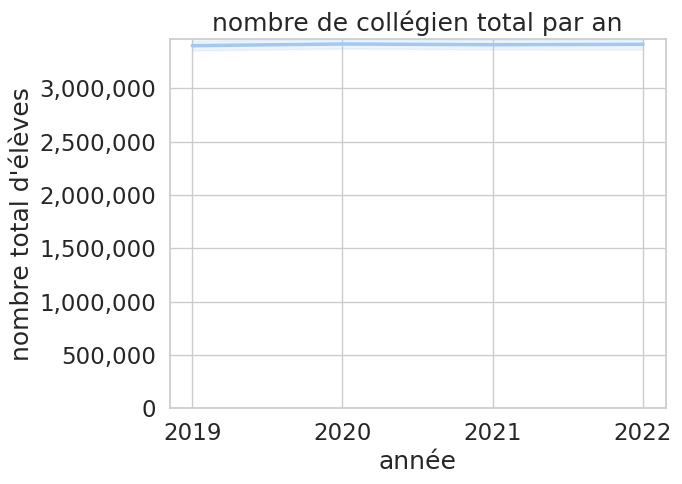

In [36]:
fig,ax = plt.subplots()
sns.lineplot(data=fichier_college,x='rentree_scolaire',y='nombre_eleves_total',ax=ax,estimator='sum')
ax.set_ylim(0)
ax.ticklabel_format(axis='y',style='plain')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ",")))
ax.set_title("nombre de collégien total par an")
ax.set_xlabel("année")
ax.set_ylabel("nombre total d'élèves")
plt.show()

Nous avons environ 3 millions de collegien.

In [37]:
#trouver comment avoir le nombre de classe des colleges

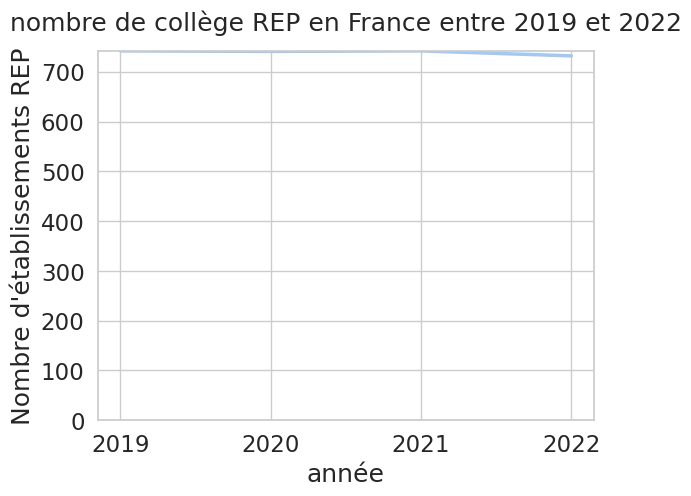

In [38]:
fig,ax = plt.subplots()
sns.lineplot(data=france_college,x='rentree_scolaire',y='rep',ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("nombre de collège REP en France entre 2019 et 2022",pad=15)
ax.set_xlabel("année")
ax.set_ylabel("Nombre d'établissements REP")
ax.set_ylim(0)
plt.show()

Le nombre d'etablissement en REP baisse très legèrement.

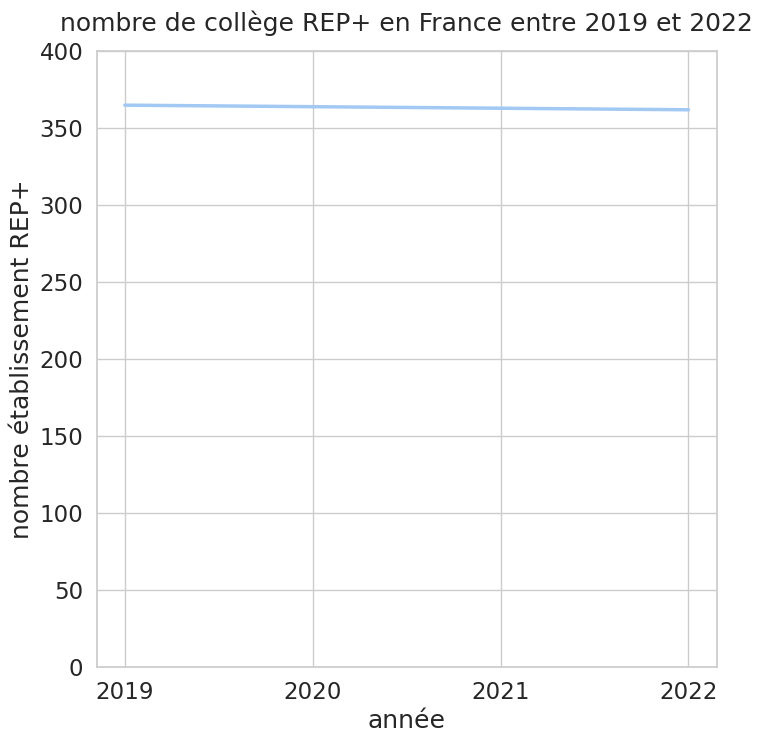

In [39]:
fig,ax = plt.subplots()
fig.set_size_inches(8,8)
sns.lineplot(data=france_college,x='rentree_scolaire',y='rep_plus',ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("nombre de collège REP+ en France entre 2019 et 2022",pad=15)
ax.set_xlabel("année")
ax.set_ylabel("nombre établissement REP+")
ax.set_ylim(0,400)
plt.show()

Le nombre détablissement en REP+ est en légére baisse aussi.

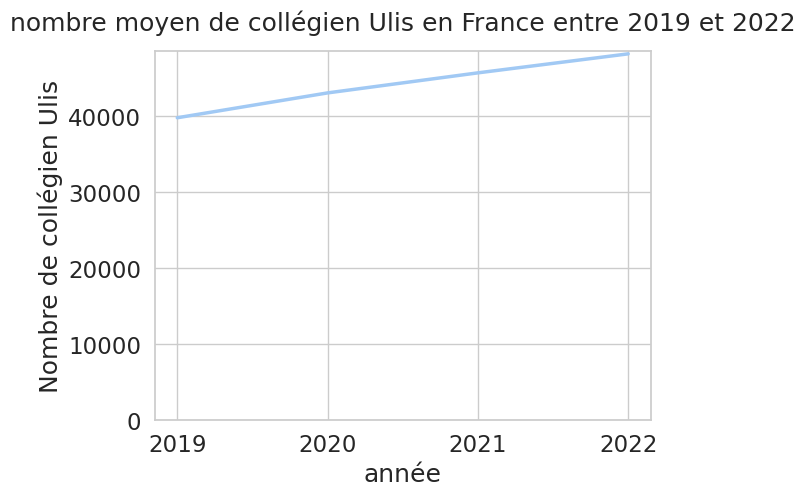

In [40]:
fig,ax = plt.subplots()
sns.lineplot(data=france_college,x='rentree_scolaire',y='nombre_eleves_ulis',ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("nombre moyen de collégien Ulis en France entre 2019 et 2022",pad=15)
ax.set_xlabel("année")
ax.set_ylabel("Nombre de collégien Ulis")
ax.set_ylim(0)
plt.show()

Augmentation des éléves Ulis au collège

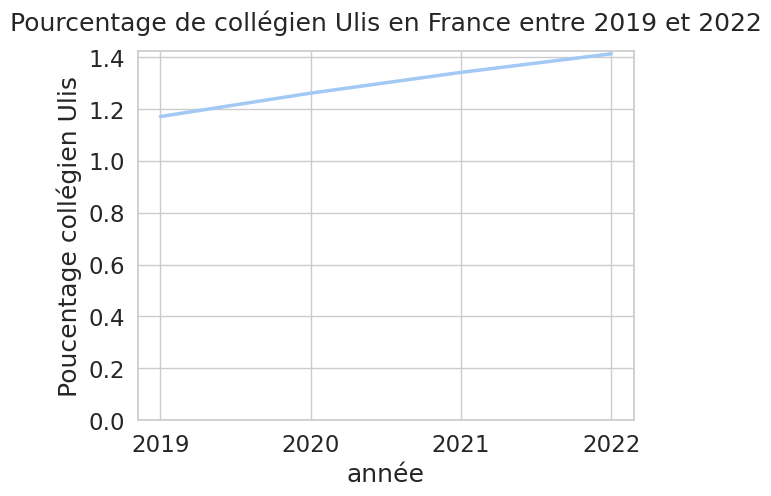

In [41]:
fig,ax = plt.subplots()
sns.lineplot(data=france_college,x='rentree_scolaire',y='pourcentage_ulis_total',ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("Pourcentage de collégien Ulis en France entre 2019 et 2022",pad=15)
ax.set_xlabel("année")
ax.set_ylabel("Poucentage collégien Ulis")
ax.set_ylim(0)
plt.show()

On a un pourcentage de collégien Ulis en augmentation. 

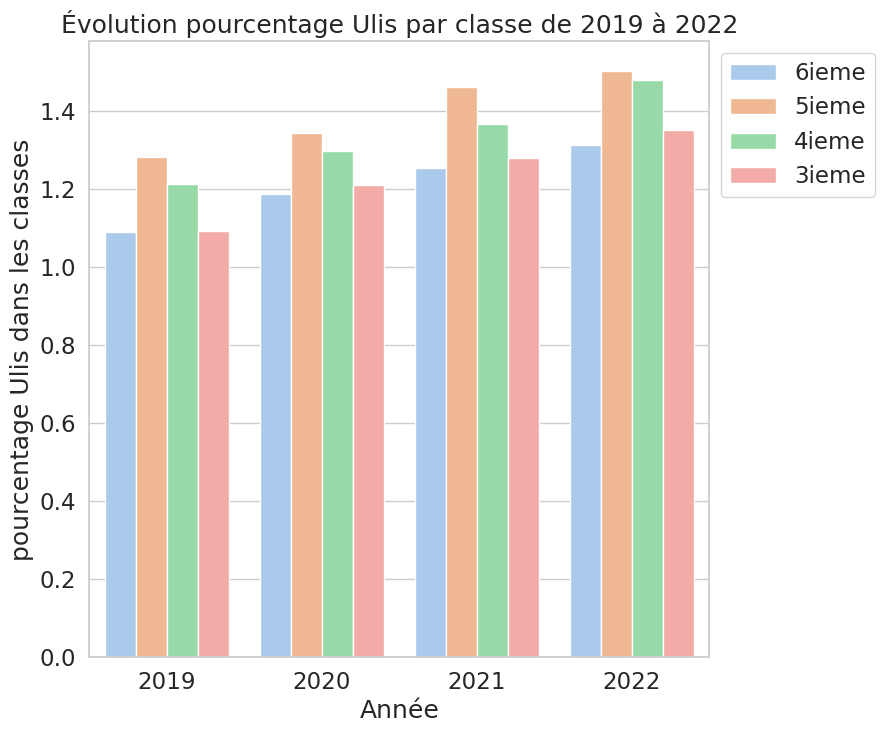

In [42]:

pourcentage_ulis_college = france_college.melt(id_vars='rentree_scolaire',
                                                value_vars=['pourcentage_ulis_6ieme','pourcentage_ulis_5ieme','pourcentage_ulis_4ieme','pourcentage_ulis_3ieme'],
                                                var_name='classe',
                                                value_name='pourcentage')

fig,ax=plt.subplots()
fig.set_size_inches(8,8)

sns.barplot(data=pourcentage_ulis_college,
            x='rentree_scolaire',
            y='pourcentage',
            hue='classe',
            ax=ax,            
            )

ax.set_title("Évolution pourcentage Ulis par classe de 2019 à 2022")
ax.set_xlabel("Année")
ax.set_ylabel("pourcentage Ulis dans les classes")

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles,labels=['6ieme','5ieme','4ieme','3ieme'])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()
del pourcentage_ulis_college

Les Ulis sont souvent en 5ieme et 4ieme principalement.

A savoir : On peux un enfants peut quitter le status ulis pour revenir en classe normale s'il a une bonne inclusion.Ce qui explique que les éléves ulis baisse en 3ieme. (brevet + orientation sans l´etiquette "ulis").<br>
Les changements aux colléges peuvent permettre de detecter des problémes.<br>
Il y a donc une intégration des èlèves en Ulis l'année d'après. 

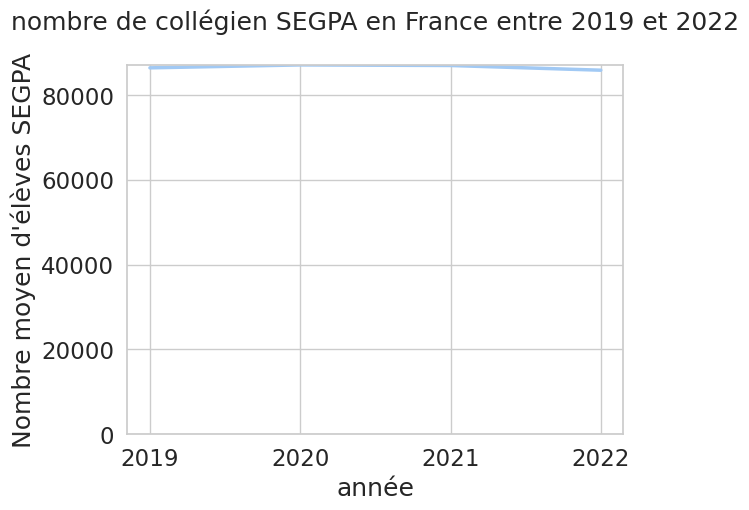

In [43]:
fig,ax = plt.subplots()
sns.lineplot(data=france_college,x='rentree_scolaire',y='nombre_eleves_segpa',ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("nombre de collégien SEGPA en France entre 2019 et 2022",pad=25)
ax.set_xlabel("année")
ax.set_ylabel("Nombre moyen d'élèves SEGPA")
ax.set_ylim(0)
plt.show()

Le nombre de collègien segpa reste stable avec une lègère baisse en 2022.

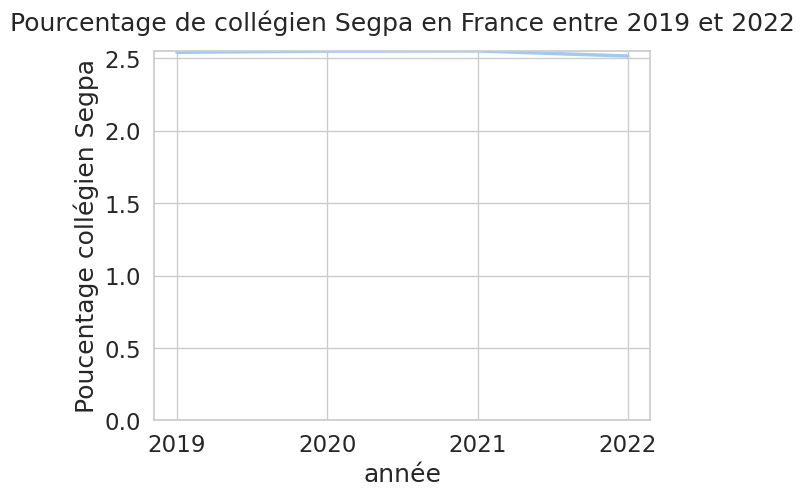

In [44]:
#SEGPA pourcentage
fig,ax = plt.subplots()
sns.lineplot(data=france_college,x='rentree_scolaire',y='pourcentage_segpa_total',ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("Pourcentage de collégien Segpa en France entre 2019 et 2022",pad=15)
ax.set_xlabel("année")
ax.set_ylabel("Poucentage collégien Segpa")
ax.set_ylim(0)
plt.show()

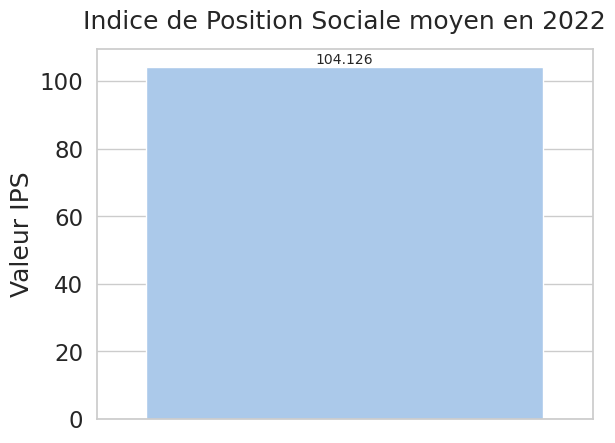

In [45]:
fig,ax = plt.subplots()
sns.barplot(data=france_college, y="ips",ax=ax,estimator="sum",errorbar=None)
ax.set_title("Indice de Position Sociale moyen en 2022",pad=15)
ax.set_ylabel("Valeur IPS")
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_ylim(0)
plt.show()

valeur de l'indice IPS (indice de position sociale): 104.126

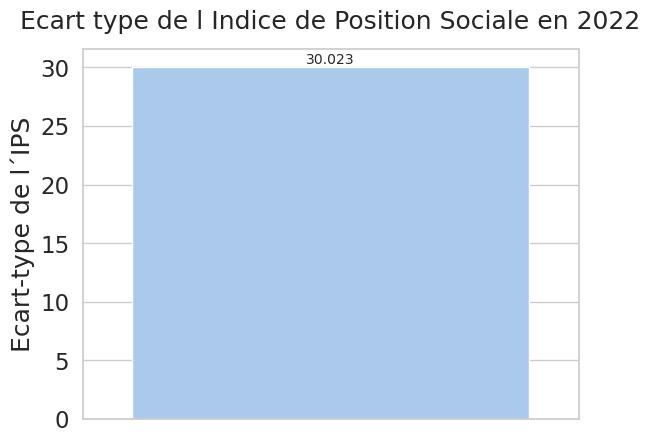

In [46]:
fig,ax = plt.subplots()
sns.barplot(data=france_college, y="ecart_type_de_l_ips",ax=ax,estimator="sum",errorbar=None)
ax.set_title("Ecart type de l Indice de Position Sociale en 2022",pad=15)
ax.set_ylabel("Ecart-type de l´IPS")
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_ylim(0)
plt.show()

Il y a un écart type moyen de l'IPS de 30

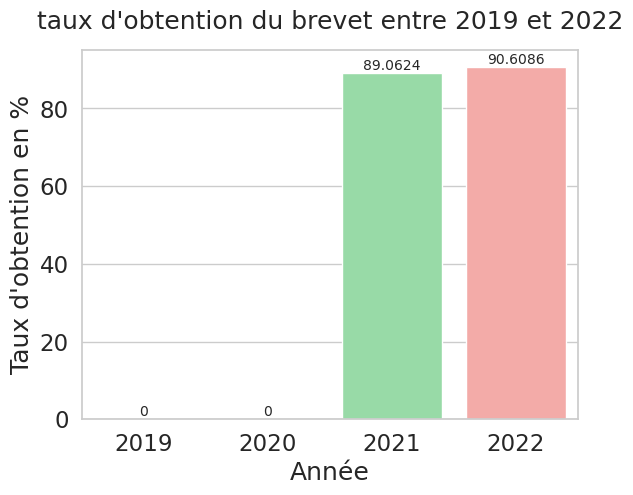

In [47]:
fig,ax = plt.subplots()
sns.barplot(data=france_college, x="rentree_scolaire", y="taux_de_reussite_g",ax=ax,estimator="sum",errorbar=None)
ax.set_title("taux d'obtention du brevet entre 2019 et 2022",pad=15)
ax.set_ylabel("Taux d'obtention en %")
ax.set_xlabel("Année")
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_ylim(0)
plt.show()

On a un taux stable de près de 90%.<br>
9 éléve sur 10. 

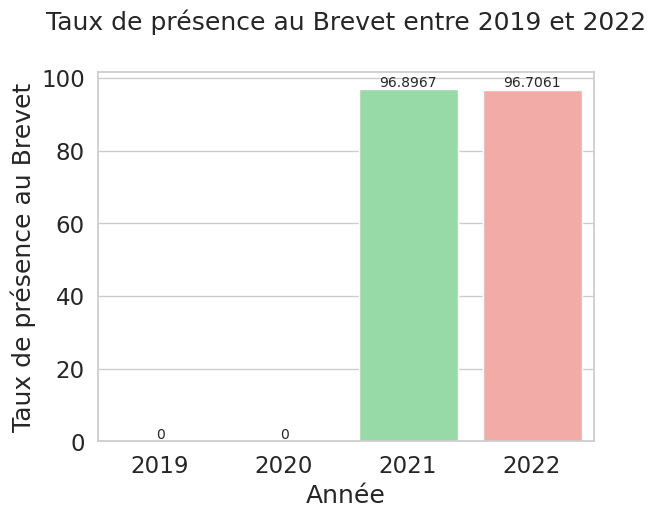

In [48]:
fig,ax = plt.subplots()
sns.barplot(data=france_college, x="rentree_scolaire", y="part_presents_3eme_ordinaire_total",ax=ax,estimator="sum",errorbar=None)
ax.set_title("Taux de présence au Brevet entre 2019 et 2022",pad=30)
ax.set_ylabel("Taux de présence au Brevet")
ax.set_xlabel("Année")
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_ylim(0)
plt.show()

4% des élèves ne se pésentent pas à l'examen.

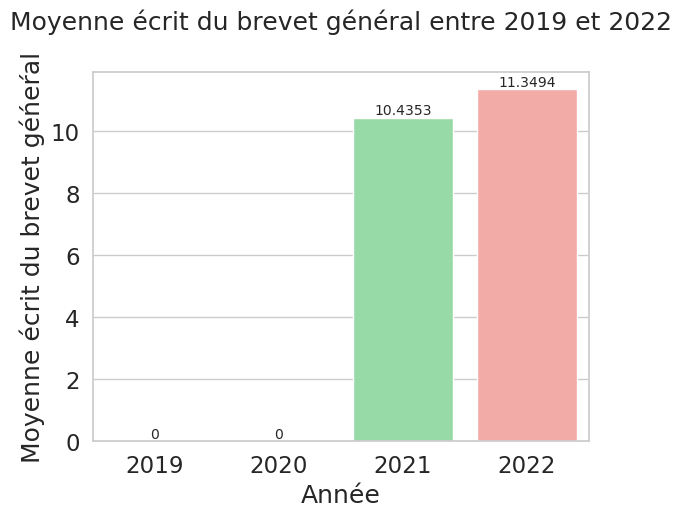

In [49]:
fig,ax = plt.subplots()
sns.barplot(data=france_college, x="rentree_scolaire", y="note_a_l_ecrit_g",ax=ax,estimator="sum",errorbar=None)
ax.set_title("Moyenne écrit du brevet général entre 2019 et 2022",pad=30)
ax.set_ylabel("Moyenne écrit du brevet géńeŕal")
ax.set_xlabel("Année")
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_ylim(0)
plt.show()

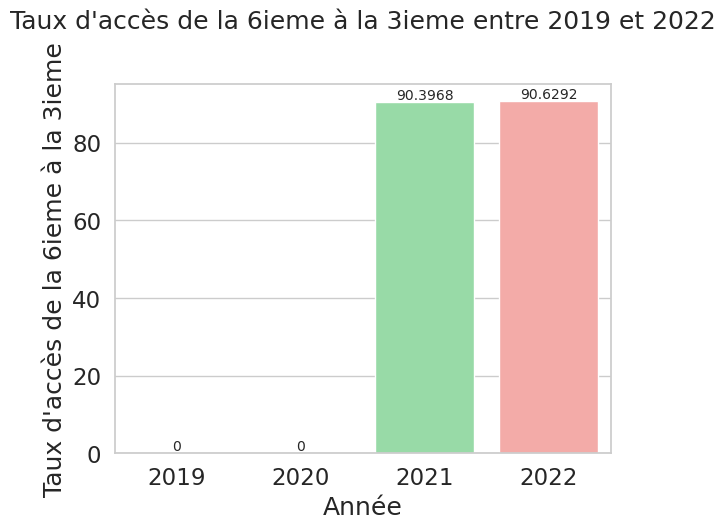

In [50]:
fig,ax = plt.subplots()
sns.barplot(data=france_college, x="rentree_scolaire", y='taux_d_acces_6eme_3eme',ax=ax,estimator="sum",errorbar=None)
ax.set_title("Taux d'accès de la 6ieme à la 3ieme entre 2019 et 2022",pad=40)
ax.set_ylabel("Taux d'accès de la 6ieme à la 3ieme")
ax.set_xlabel("Année")
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_ylim(0)
plt.show()

Le taux d'accès de la 6 ieme à la 3ieme : Pourcentage d'éléve qui ont fait leurs scolarité entiere dans le college.<br>
Les redoublants, les déménagements, les changements du à une option indisponible dans le collège ne sont pas pris en compte dans cet indiquateur.<br>

Les éléves restent à 90% dans leurs établisements.<br>

In [51]:
#nettoyage memoire
del france_college

## Analyse orienté public privé
Les colleges privée ont-ils de meileurs résultats? 

In [52]:
fichier_college = pd.read_csv('donnee_temp/college.csv',dtype={'code_insee_de_la_commune': str,
                                                                'part_presents_3eme_ordinaire_g' : str,
                                                                'part_presents_3eme_ordinaire_p': str,
                                                                'part_presents_3eme_segpa_total' : str})

In [53]:
fichier_college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32984 entries, 0 to 32983
Data columns (total 61 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   rentree_scolaire                          32984 non-null  int64  
 1   region_academique                         32982 non-null  object 
 2   academie                                  32982 non-null  object 
 3   departement                               32982 non-null  object 
 4   commune                                   32982 non-null  object 
 5   uai                                       32984 non-null  object 
 6   denomination_principale                   32982 non-null  object 
 7   patronyme                                 32927 non-null  object 
 8   secteur                                   32982 non-null  object 
 9   rep                                       32982 non-null  float64
 10  rep_plus                          

In [54]:
# faire un dataframe pour analyse
# agregation des données pour vu française

# Mettre ici les données à moyenner/autre  au lieu de sommer
dico_mean = {
    "effectifs":'mean',
    'ips':'mean',
    'ecart_type_de_l_ips':'mean',
    'taux_de_reussite_g':"mean",
    'note_a_l_ecrit_g':'mean',
    'part_presents_3eme_ordinaire_total':'mean',
    'taux_d_acces_6eme_3eme':'mean'  
}

france_public_prive_mean = fichier_college.groupby(by=['rentree_scolaire', 'secteur']).agg(dico_mean,numeric_only=True)
for key in dico_mean:
    fichier_college.drop(columns=key,inplace=True)    

france_public_prive = fichier_college.groupby(by=['rentree_scolaire', 'secteur']).sum(numeric_only=True)

france_public_prive.reset_index(inplace=True)
france_public_prive_mean.reset_index(inplace=True)
france_public_prive = pd.merge(france_public_prive,france_public_prive_mean,on=['rentree_scolaire','secteur'],how='outer')

# rajout de colonne pour graphes
france_public_prive['pourcentage_ulis_total'] = france_public_prive['nombre_eleves_ulis']/france_public_prive['nombre_eleves_total']*100
france_public_prive['pourcentage_segpa_total'] = france_public_prive['nombre_eleves_segpa']/france_public_prive['nombre_eleves_total']*100

for classe in range(3,7,1):
    classe_total = str(classe)+"eme_total"
    classe_ulis = str(classe)+"eme_ulis"
    pourcentage_ulis = 'pourcentage_ulis_'+str(classe)+'ieme'
    france_public_prive[pourcentage_ulis] = france_public_prive[classe_ulis]/france_public_prive[classe_total]*100

#économie de memoire :
del france_public_prive_mean

In [55]:
france_public_prive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 56 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   rentree_scolaire                          8 non-null      int64  
 1   secteur                                   8 non-null      object 
 2   rep                                       8 non-null      float64
 3   rep_plus                                  8 non-null      float64
 4   nombre_eleves_total                       8 non-null      float64
 5   nombre_eleves_total_hors_segpa_hors_ulis  8 non-null      float64
 6   nombre_eleves_segpa                       8 non-null      float64
 7   nombre_eleves_ulis                        8 non-null      float64
 8   6eme_total                                8 non-null      float64
 9   6eme_hors_segpa_hors_ulis                 8 non-null      float64
 10  6eme_segpa                                

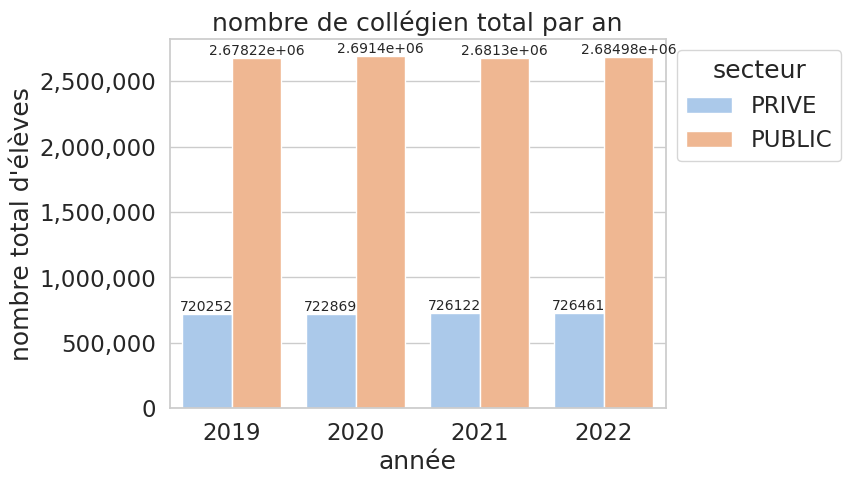

In [56]:
fig,ax = plt.subplots()
sns.barplot(data=france_public_prive,x='rentree_scolaire',y='nombre_eleves_total',hue='secteur',ax=ax)
ax.set_ylim(0)
ax.ticklabel_format(axis='y',style='plain')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ",")))
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.set_title("nombre de collégien total par an")
ax.set_xlabel("année")
ax.set_ylabel("nombre total d'élèves")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

Le college privée concerne environ 20 % des élèves. Les populations restent stables

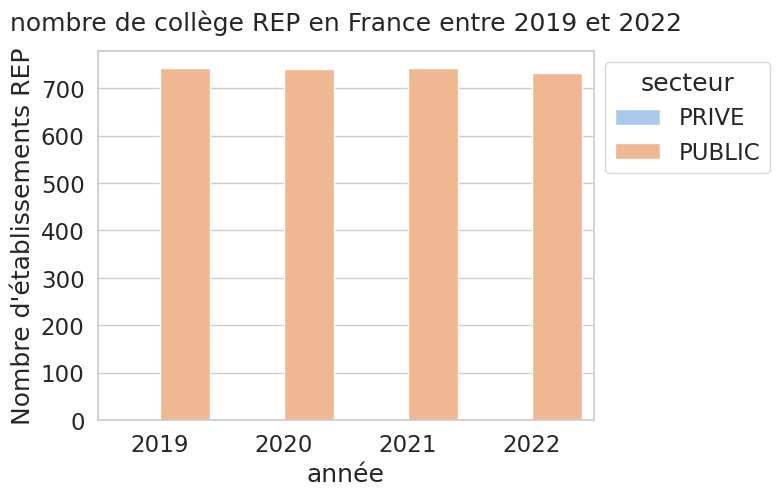

In [57]:
fig,ax = plt.subplots()
sns.barplot(data=france_public_prive,x='rentree_scolaire',y='rep',hue='secteur',ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("nombre de collège REP en France entre 2019 et 2022",pad=15)
ax.set_xlabel("année")
ax.set_ylabel("Nombre d'établissements REP")
ax.set_ylim(0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

La totalité des établissements en REP sont public.

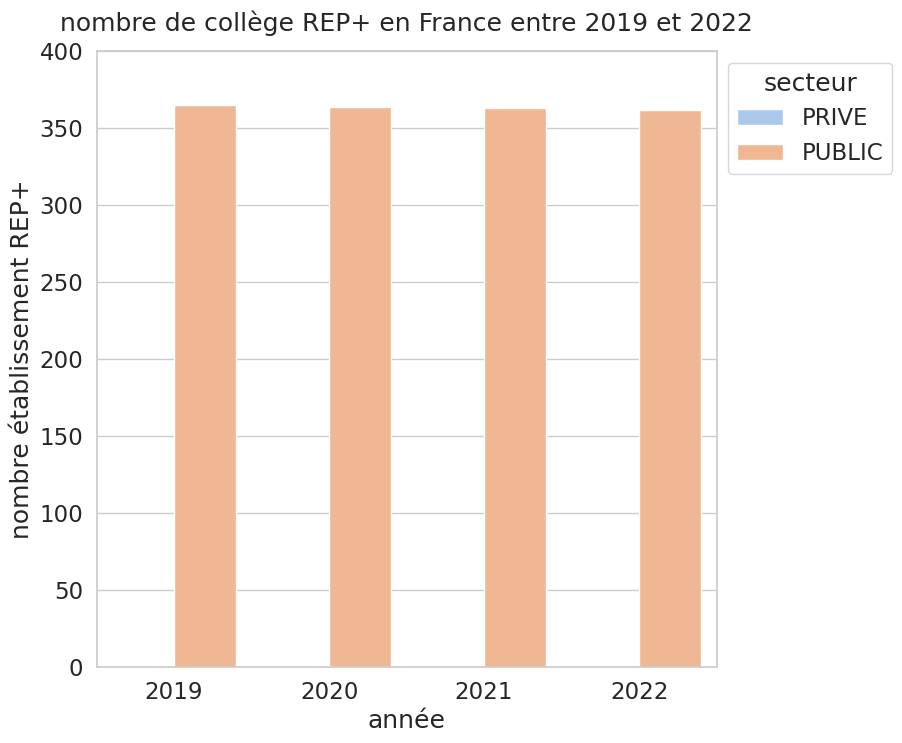

In [58]:
fig,ax = plt.subplots()
fig.set_size_inches(8,8)
sns.barplot(data=france_public_prive,x='rentree_scolaire',y='rep_plus',hue='secteur',ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("nombre de collège REP+ en France entre 2019 et 2022",pad=15)
ax.set_xlabel("année")
ax.set_ylabel("nombre établissement REP+")
ax.set_ylim(0,400)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

Pareil pour la zone REP+

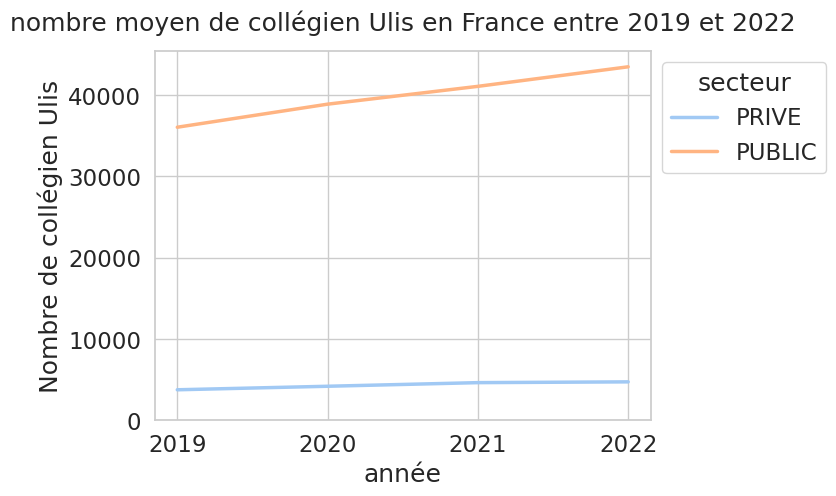

In [59]:
fig,ax = plt.subplots()
sns.lineplot(data=france_public_prive,x='rentree_scolaire',y='nombre_eleves_ulis',hue='secteur',ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("nombre moyen de collégien Ulis en France entre 2019 et 2022",pad=15)
ax.set_xlabel("année")
ax.set_ylabel("Nombre de collégien Ulis")
ax.set_ylim(0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

Il y a une forte augmentation des collegiens Ulis dans le public. L'augmentation est moindre dans le privée.

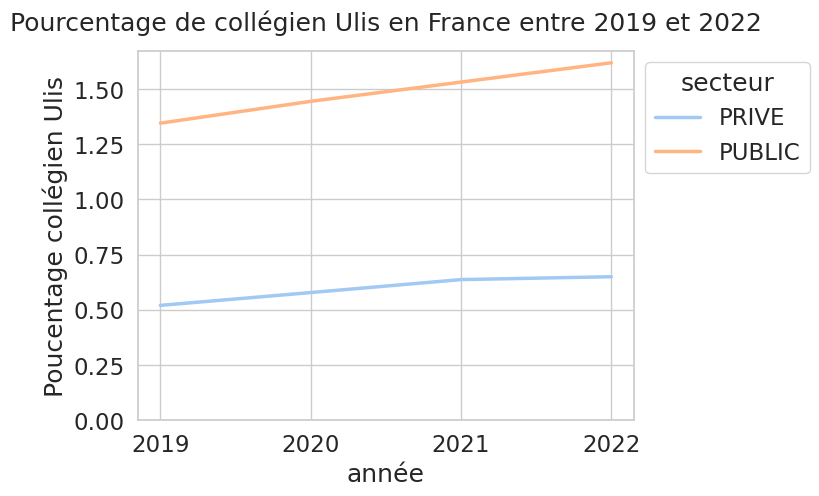

In [60]:
fig,ax = plt.subplots()
sns.lineplot(data=france_public_prive,x='rentree_scolaire',y='pourcentage_ulis_total',hue='secteur',ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("Pourcentage de collégien Ulis en France entre 2019 et 2022",pad=15)
ax.set_xlabel("année")
ax.set_ylabel("Poucentage collégien Ulis")
ax.set_ylim(0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

En pourcentage, il y a 1 point de moins d'élèves Ulis en privée.

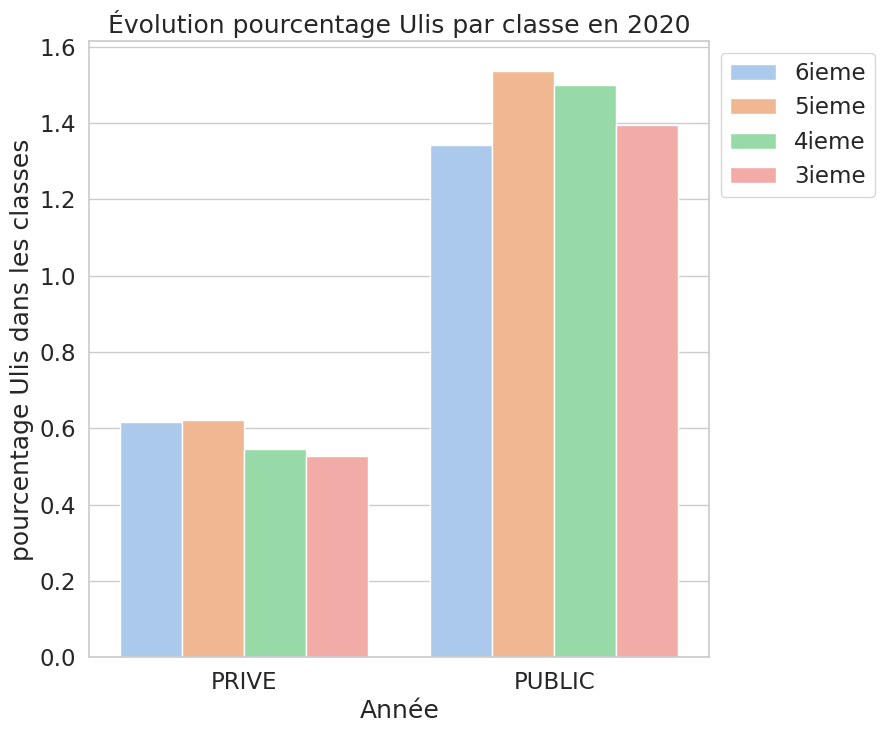

In [61]:
college2020 = france_public_prive[france_public_prive['rentree_scolaire']==2020].copy()
pourcentage_ulis_college = college2020.melt(id_vars=['secteur'],
                                                value_vars=['pourcentage_ulis_6ieme','pourcentage_ulis_5ieme','pourcentage_ulis_4ieme','pourcentage_ulis_3ieme'],
                                                var_name='classe',
                                                value_name='pourcentage')

fig,ax=plt.subplots()
fig.set_size_inches(8,8)

sns.barplot(data=pourcentage_ulis_college,
            x='secteur',
            y='pourcentage',
            hue='classe',
            ax=ax,            
            )

ax.set_title("Évolution pourcentage Ulis par classe en 2020")
ax.set_xlabel("Année")
ax.set_ylabel("pourcentage Ulis dans les classes")

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles,labels=['6ieme','5ieme','4ieme','3ieme'])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()
del pourcentage_ulis_college,college2020

Les éléves Ulis en privée restent stable. Alors que dans le public, la population Ulis varient plus.

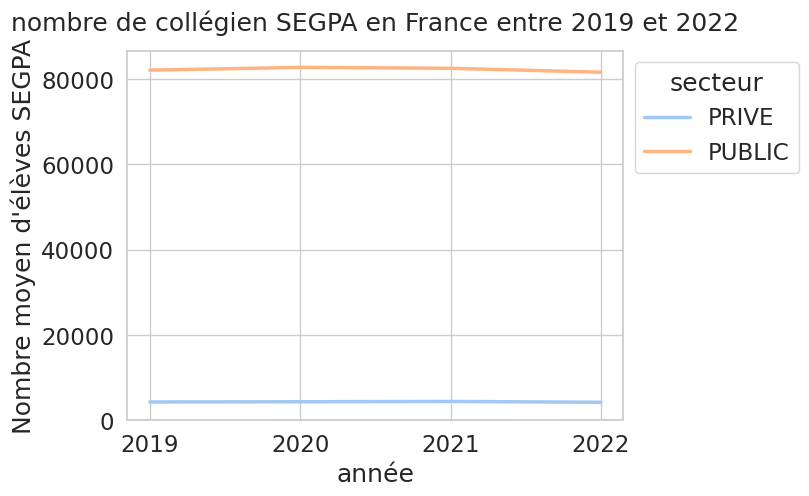

In [62]:
fig,ax = plt.subplots()
sns.lineplot(data=france_public_prive,x='rentree_scolaire',y='nombre_eleves_segpa',hue='secteur',ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("nombre de collégien SEGPA en France entre 2019 et 2022",pad=15)
ax.set_xlabel("année")
ax.set_ylabel("Nombre moyen d'élèves SEGPA")
ax.set_ylim(0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

Aucune classe SEGPA en privée.

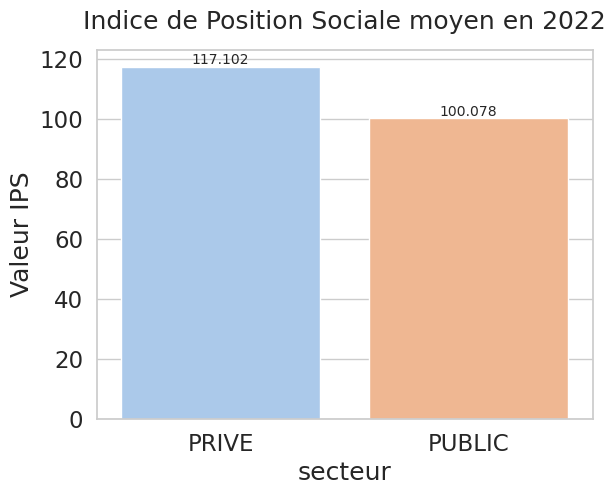

In [63]:
fig,ax = plt.subplots()
sns.barplot(data=france_public_prive, y="ips",ax=ax,estimator="sum",x='secteur',errorbar=None)
ax.set_title("Indice de Position Sociale moyen en 2022",pad=15)
ax.set_ylabel("Valeur IPS")
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_ylim(0)
plt.show()

Sans surprise, le college public étant payant, l IP est plus élèvé dans le privée.

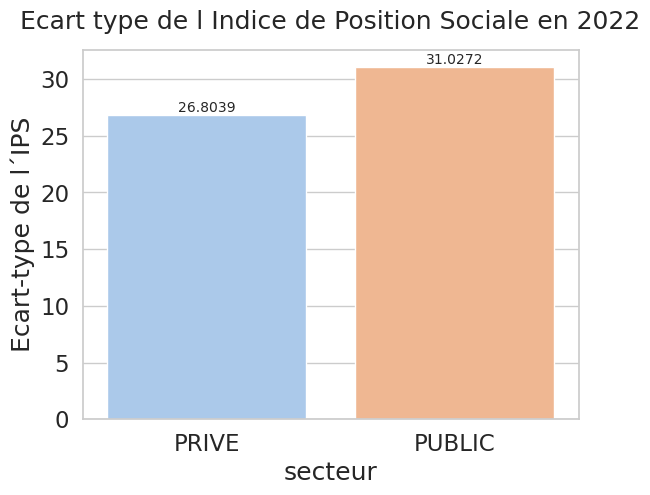

In [64]:
fig,ax = plt.subplots()
sns.barplot(data=france_public_prive,x='secteur', y="ecart_type_de_l_ips",ax=ax,estimator="sum",errorbar=None)
ax.set_title("Ecart type de l Indice de Position Sociale en 2022",pad=15)
ax.set_ylabel("Ecart-type de l´IPS")
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_ylim(0)
plt.show()

L'écart type est moins marqué dans le privée sous contrat.

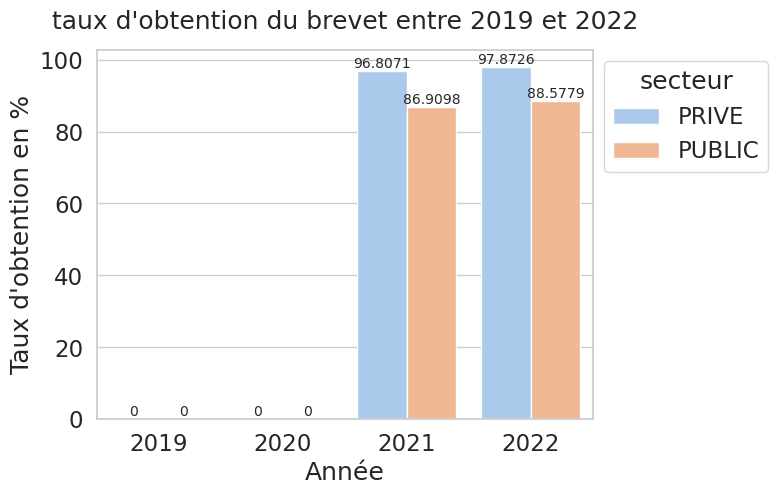

In [65]:
fig,ax = plt.subplots()
sns.barplot(data=france_public_prive, x="rentree_scolaire", y="taux_de_reussite_g",ax=ax,hue="secteur",estimator="sum",errorbar=None)
ax.set_title("taux d'obtention du brevet entre 2019 et 2022",pad=15)
ax.set_ylabel("Taux d'obtention en %")
ax.set_xlabel("Année")
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.set_ylim(0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

Il y a un écart de 10 points entre les écoles privées et publiques.<br>
Cet écart peut s'expliquer par :
<ul>
    <li>la presence supérieure des Ulis dans le public</li>
    <li>les classes Sepgpa</li>
    <li>un IPS plus élevé</li>
</ul>


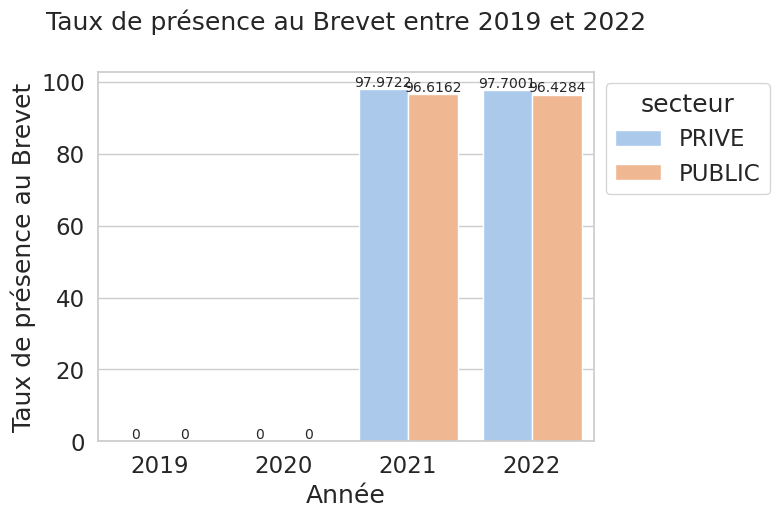

In [66]:
fig,ax = plt.subplots()
sns.barplot(data=france_public_prive, hue='secteur', x="rentree_scolaire", y="part_presents_3eme_ordinaire_total",ax=ax,estimator="sum",errorbar=None)
ax.set_title("Taux de présence au Brevet entre 2019 et 2022",pad=30)
ax.set_ylabel("Taux de présence au Brevet")
ax.set_xlabel("Année")
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.set_ylim(0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

Le collège privée a un taux de présence au brevets supeŕieur de 1.3 %. Les taux sont élevé superieur à 96 %

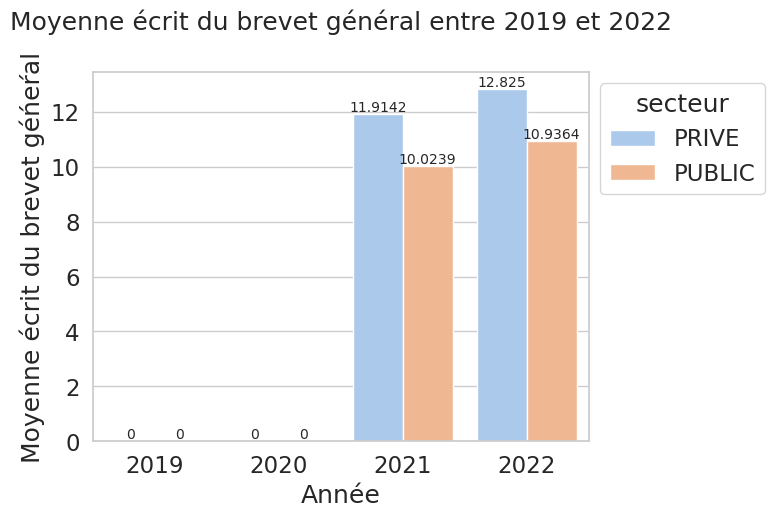

In [67]:
fig,ax = plt.subplots()
sns.barplot(data=france_public_prive, x="rentree_scolaire", y="note_a_l_ecrit_g", hue='secteur',ax=ax,estimator="sum",errorbar=None)
ax.set_title("Moyenne écrit du brevet général entre 2019 et 2022",pad=30)
ax.set_ylabel("Moyenne écrit du brevet géńeŕal")
ax.set_xlabel("Année")
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.set_ylim(0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

On a quaisment 2 points d'écart entre le privée et le public.

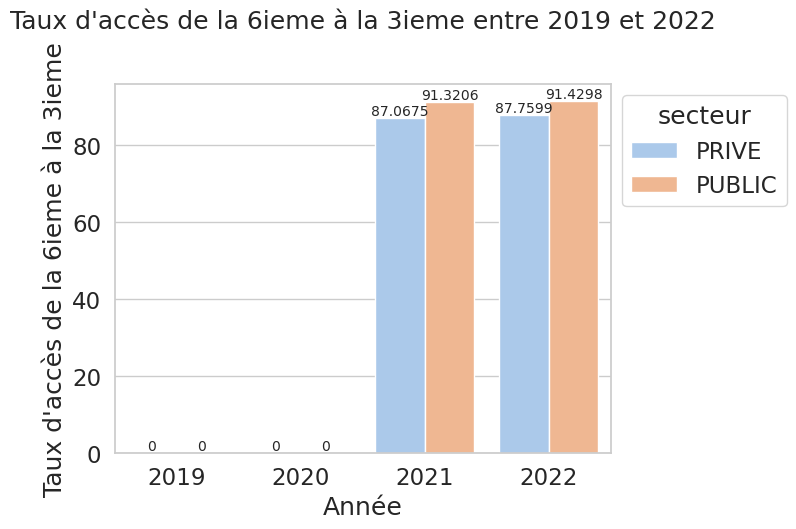

In [68]:
fig,ax = plt.subplots()
sns.barplot(data=france_public_prive, x="rentree_scolaire", y='taux_d_acces_6eme_3eme',hue='secteur',ax=ax,estimator="sum",errorbar=None)
ax.set_title("Taux d'accès de la 6ieme à la 3ieme entre 2019 et 2022",pad=40)
ax.set_ylabel("Taux d'accès de la 6ieme à la 3ieme")
ax.set_xlabel("Année")
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_ylim(0)
plt.show()

Un élèves dans le privée à 13% de chance de ne pas suivre tout son apprentissage dans son collèges. Contre 9% dans le public.

Conclusion :<br>
On observe un gain si l'enfant est placé dans le privée. Mais on ne peut pas affirmer que ce gain est dû au collège, ou au cadre extérieur de l'élève. (IPS).<br>
<br>
Une étude plus approfondi est nécéssaire pour comprendre.

In [69]:
fichier_college = pd.read_csv('donnee_temp/college.csv',dtype={'code_insee_de_la_commune': str,
                                                                'part_presents_3eme_ordinaire_g' : str,
                                                                'part_presents_3eme_ordinaire_p': str,
                                                                'part_presents_3eme_segpa_total' : str})

In [70]:
fichier_college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32984 entries, 0 to 32983
Data columns (total 61 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   rentree_scolaire                          32984 non-null  int64  
 1   region_academique                         32982 non-null  object 
 2   academie                                  32982 non-null  object 
 3   departement                               32982 non-null  object 
 4   commune                                   32982 non-null  object 
 5   uai                                       32984 non-null  object 
 6   denomination_principale                   32982 non-null  object 
 7   patronyme                                 32927 non-null  object 
 8   secteur                                   32982 non-null  object 
 9   rep                                       32982 non-null  float64
 10  rep_plus                          

In [71]:
# test statistique sur privé/public resultats et Ulis resultats
pop_privé = fichier_college[fichier_college['secteur']=='PRIVE'].copy()
pop_public = fichier_college[fichier_college['secteur']=='PUBLIC'].copy()

result = perso_stats.ANOVA(df1=pop_privé['nombre_eleves_ulis'],df2=pop_public['nombre_eleves_ulis'])



Interprétation du test:
H0 : Les moyennes des groupes sont égales
H1 : Les moyennes des groupes ne sont pas égales
Étant donné que la p-values est inférieure au niveau de signification alpha = 0.05 ,
on doit rejeter l'hypothèse nulle H0 et retenir l'hypothèse H1.
Le risque de rejeter l'hypothèse nulle H0 alors qu'elle est vraie est inferieur à  0.0 %


Selon le test ANOVA, les populations des collèges privée et public du point de vue des Ulis ne sont pas les mêmes.

In [72]:
pop_privé_ips= pop_privé['ips'].dropna()
pop_public_ips= pop_public['ips'].dropna()

result = perso_stats.ANOVA(df1=pop_privé_ips,df2=pop_public_ips)



Interprétation du test:
H0 : Les moyennes des groupes sont égales
H1 : Les moyennes des groupes ne sont pas égales
Étant donné que la p-values est inférieure au niveau de signification alpha = 0.05 ,
on doit rejeter l'hypothèse nulle H0 et retenir l'hypothèse H1.
Le risque de rejeter l'hypothèse nulle H0 alors qu'elle est vraie est inferieur à  0.0 %


De même avec l indice de position sociale. On a pas la même population entre les colleges privée et public.

In [73]:
pop_privé_ips

1796     112.4
1797     110.2
1804     121.9
1806      91.9
1816     118.8
         ...  
30946    139.5
30949    147.9
30961    132.0
30966    126.7
30972    129.7
Name: ips, Length: 1658, dtype: float64

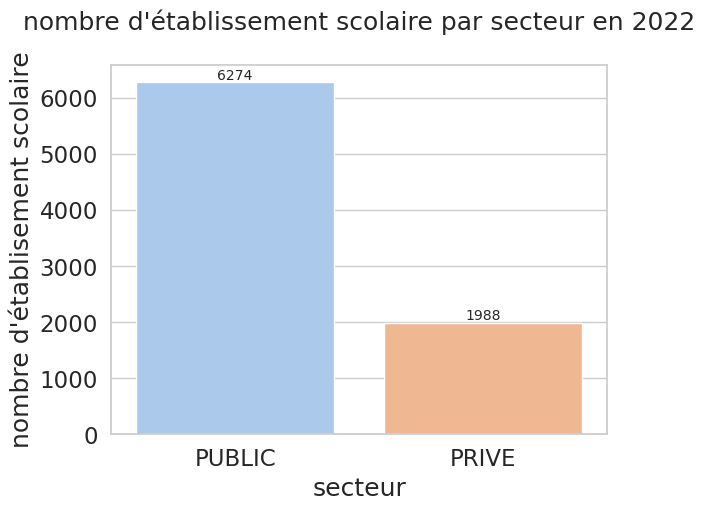

In [74]:
fig, ax = plt.subplots()
fichier_college2020 = fichier_college[fichier_college['rentree_scolaire'] == 2022]
sns.countplot(data=fichier_college2020,x='secteur',ax=ax)
ax.set_title("nombre d'établissement scolaire par secteur en 2022",pad=25)
ax.set_ylabel("nombre d'établisement scolaire")
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

In [75]:
liste_classe =['3eme_total','4eme_total','5eme_total','6eme_total']
nb_collegien_total = 0
for a in liste_classe:
    nb_collegien_total += fichier_college2020[a].sum()

#calcul nb de collegien dans le privée
fichier_college_prive_2020 = fichier_college2020[fichier_college2020['secteur']=='PRIVE']
nb_collegien_prive = 0
for a in liste_classe:
    nb_collegien_prive += fichier_college_prive_2020[a].sum()
percent_student_private = nb_collegien_prive/nb_collegien_total *100
print("pourcentage de collégien dans le privée en 2020 : ",percent_student_private)


pourcentage de collégien dans le privée en 2020 :  21.29484909598293


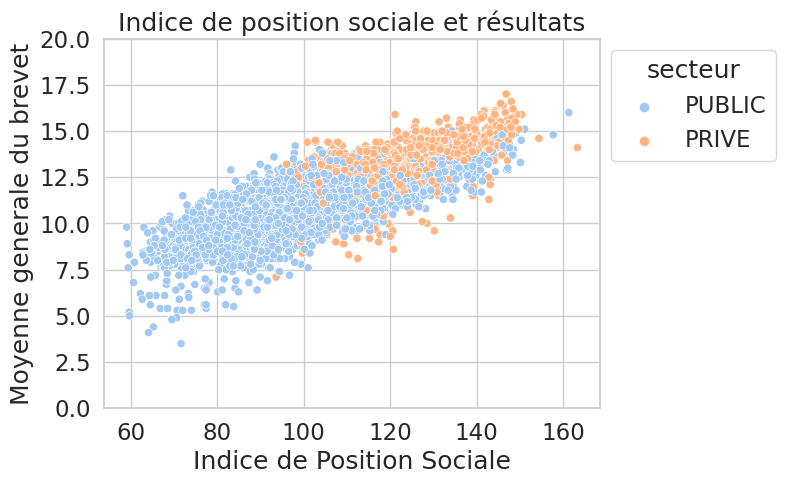

In [76]:
fig,ax = plt.subplots()
sns.scatterplot(data=fichier_college2020,y='note_a_l_ecrit_g',x='ips',hue='secteur',ax=ax)
ax.set_title('Indice de position sociale et résultats')
ax.set_ylabel('Moyenne generale du brevet')
ax.set_xlabel('Indice de Position Sociale')
ax.set_ylim(0,20)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

In [77]:
# verifier corrélation entre note et ips
corrélation_note_ips = round(fichier_college2020['ips'].corr(fichier_college2020['note_a_l_ecrit_g'])*100,2)
print("On a une corrélation de ",corrélation_note_ips,"%.")

On a une corrélation de  79.55 %.


On s'aperçois que l'IPS et les résultats à l'écrit sont fortement corréllés.

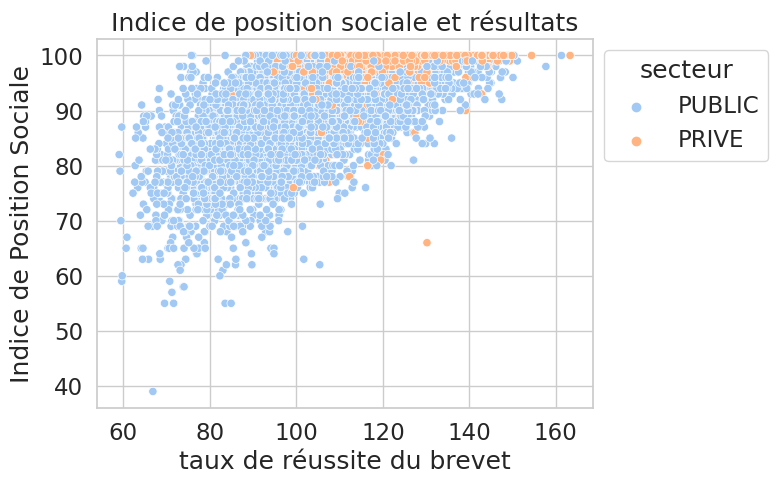

In [78]:
fig,ax = plt.subplots()
sns.scatterplot(data=fichier_college2020,y='taux_de_reussite_g',x='ips',hue='secteur',ax=ax)
ax.set_title('Indice de position sociale et résultats')
ax.set_xlabel('taux de réussite du brevet')
ax.set_ylabel('Indice de Position Sociale')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

In [79]:
corrélation_note_ips = round(fichier_college2020['ips'].corr(fichier_college2020['taux_de_reussite_g'])*100,2)
print("On a une corrélation de ",corrélation_note_ips,"%.")

On a une corrélation de  61.47 %.


La réussite aux brevet est expliquée pour plus de la moitié par la position sociale des parents.

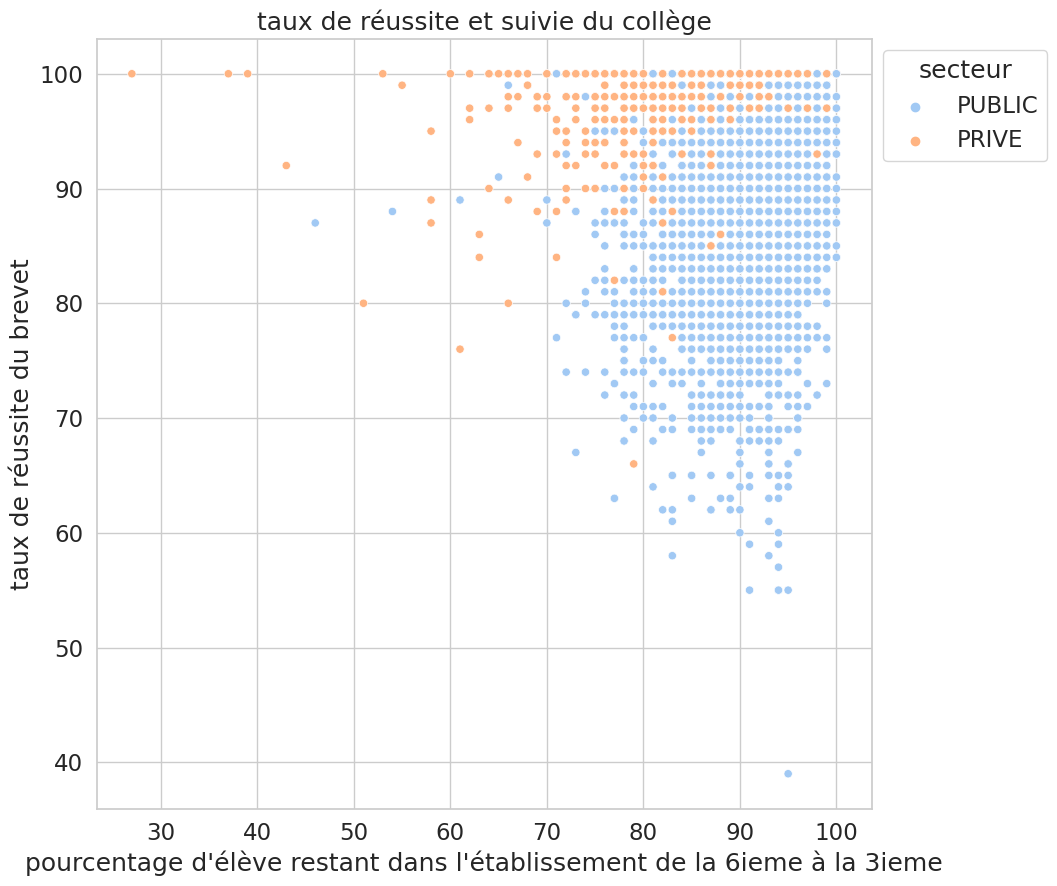

In [80]:
fig,ax = plt.subplots()
fig.set_size_inches(10,10)
sns.scatterplot(data=fichier_college2020,x='taux_d_acces_6eme_3eme' ,y='taux_de_reussite_g',hue='secteur',ax=ax)
ax.set_title('taux de réussite et suivie du collège')
ax.set_ylabel('taux de réussite du brevet')
ax.set_xlabel("pourcentage d'élève restant dans l'établissement de la 6ieme à la 3ieme")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

In [81]:
del france_public_prive

# Analyse privé/public et academie

In [82]:
# faire un dataframe academie public privé
fichier_college = pd.read_csv('donnee_temp/college.csv',dtype={'code_insee_de_la_commune': str,
                                                                'part_presents_3eme_ordinaire_g' : str,
                                                                'part_presents_3eme_ordinaire_p': str,
                                                                'part_presents_3eme_segpa_total' : str})

In [83]:
dico_mean = {
    "effectifs":'mean',
    'ips':'mean',
    'ecart_type_de_l_ips':'mean',
    'taux_de_reussite_g':"mean",
    'note_a_l_ecrit_g':'mean',
    'part_presents_3eme_ordinaire_total':'mean',
    'taux_d_acces_6eme_3eme':'mean'  
}

france_academie_mean = fichier_college.groupby(by=['rentree_scolaire', 'secteur','academie']).agg(dico_mean,numeric_only=True)
for key in dico_mean:
    fichier_college.drop(columns=key,inplace=True)    

france_academie = fichier_college.groupby(by=['rentree_scolaire', 'secteur','academie']).sum(numeric_only=True)

france_academie.reset_index(inplace=True)
france_academie_mean.reset_index(inplace=True)
france_academie = pd.merge(france_academie,france_academie_mean,on=['rentree_scolaire','secteur','academie'],how='outer')

# rajout de colonne pour graphes
france_academie['pourcentage_ulis_total'] = france_academie['nombre_eleves_ulis']/france_academie['nombre_eleves_total']*100
france_academie['pourcentage_segpa_total'] = france_academie['nombre_eleves_segpa']/france_academie['nombre_eleves_total']*100

for classe in range(3,7,1):
    classe_total = str(classe)+"eme_total"
    classe_ulis = str(classe)+"eme_ulis"
    pourcentage_ulis = 'pourcentage_ulis_'+str(classe)+'ieme'
    france_academie[pourcentage_ulis] = france_academie[classe_ulis]/france_academie[classe_total]*100

#économie de memoire :
del france_academie_mean

In [84]:
france_academie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 57 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   rentree_scolaire                          241 non-null    int64  
 1   secteur                                   241 non-null    object 
 2   academie                                  241 non-null    object 
 3   rep                                       241 non-null    float64
 4   rep_plus                                  241 non-null    float64
 5   nombre_eleves_total                       241 non-null    float64
 6   nombre_eleves_total_hors_segpa_hors_ulis  241 non-null    float64
 7   nombre_eleves_segpa                       241 non-null    float64
 8   nombre_eleves_ulis                        241 non-null    float64
 9   6eme_total                                241 non-null    float64
 10  6eme_hors_segpa_hors_ulis             

In [85]:
france_academie_2022 = france_academie[france_academie['rentree_scolaire']==2022].copy()

In [86]:
# creation d'une serie classer pour les acaemie par IPS
france_academie_2022_gen = france_academie_2022.groupby(by='academie').agg('mean',numeric_only = True)
rank_ips = france_academie_2022_gen.sort_values(by='ips',ascending=False).reset_index()['academie']

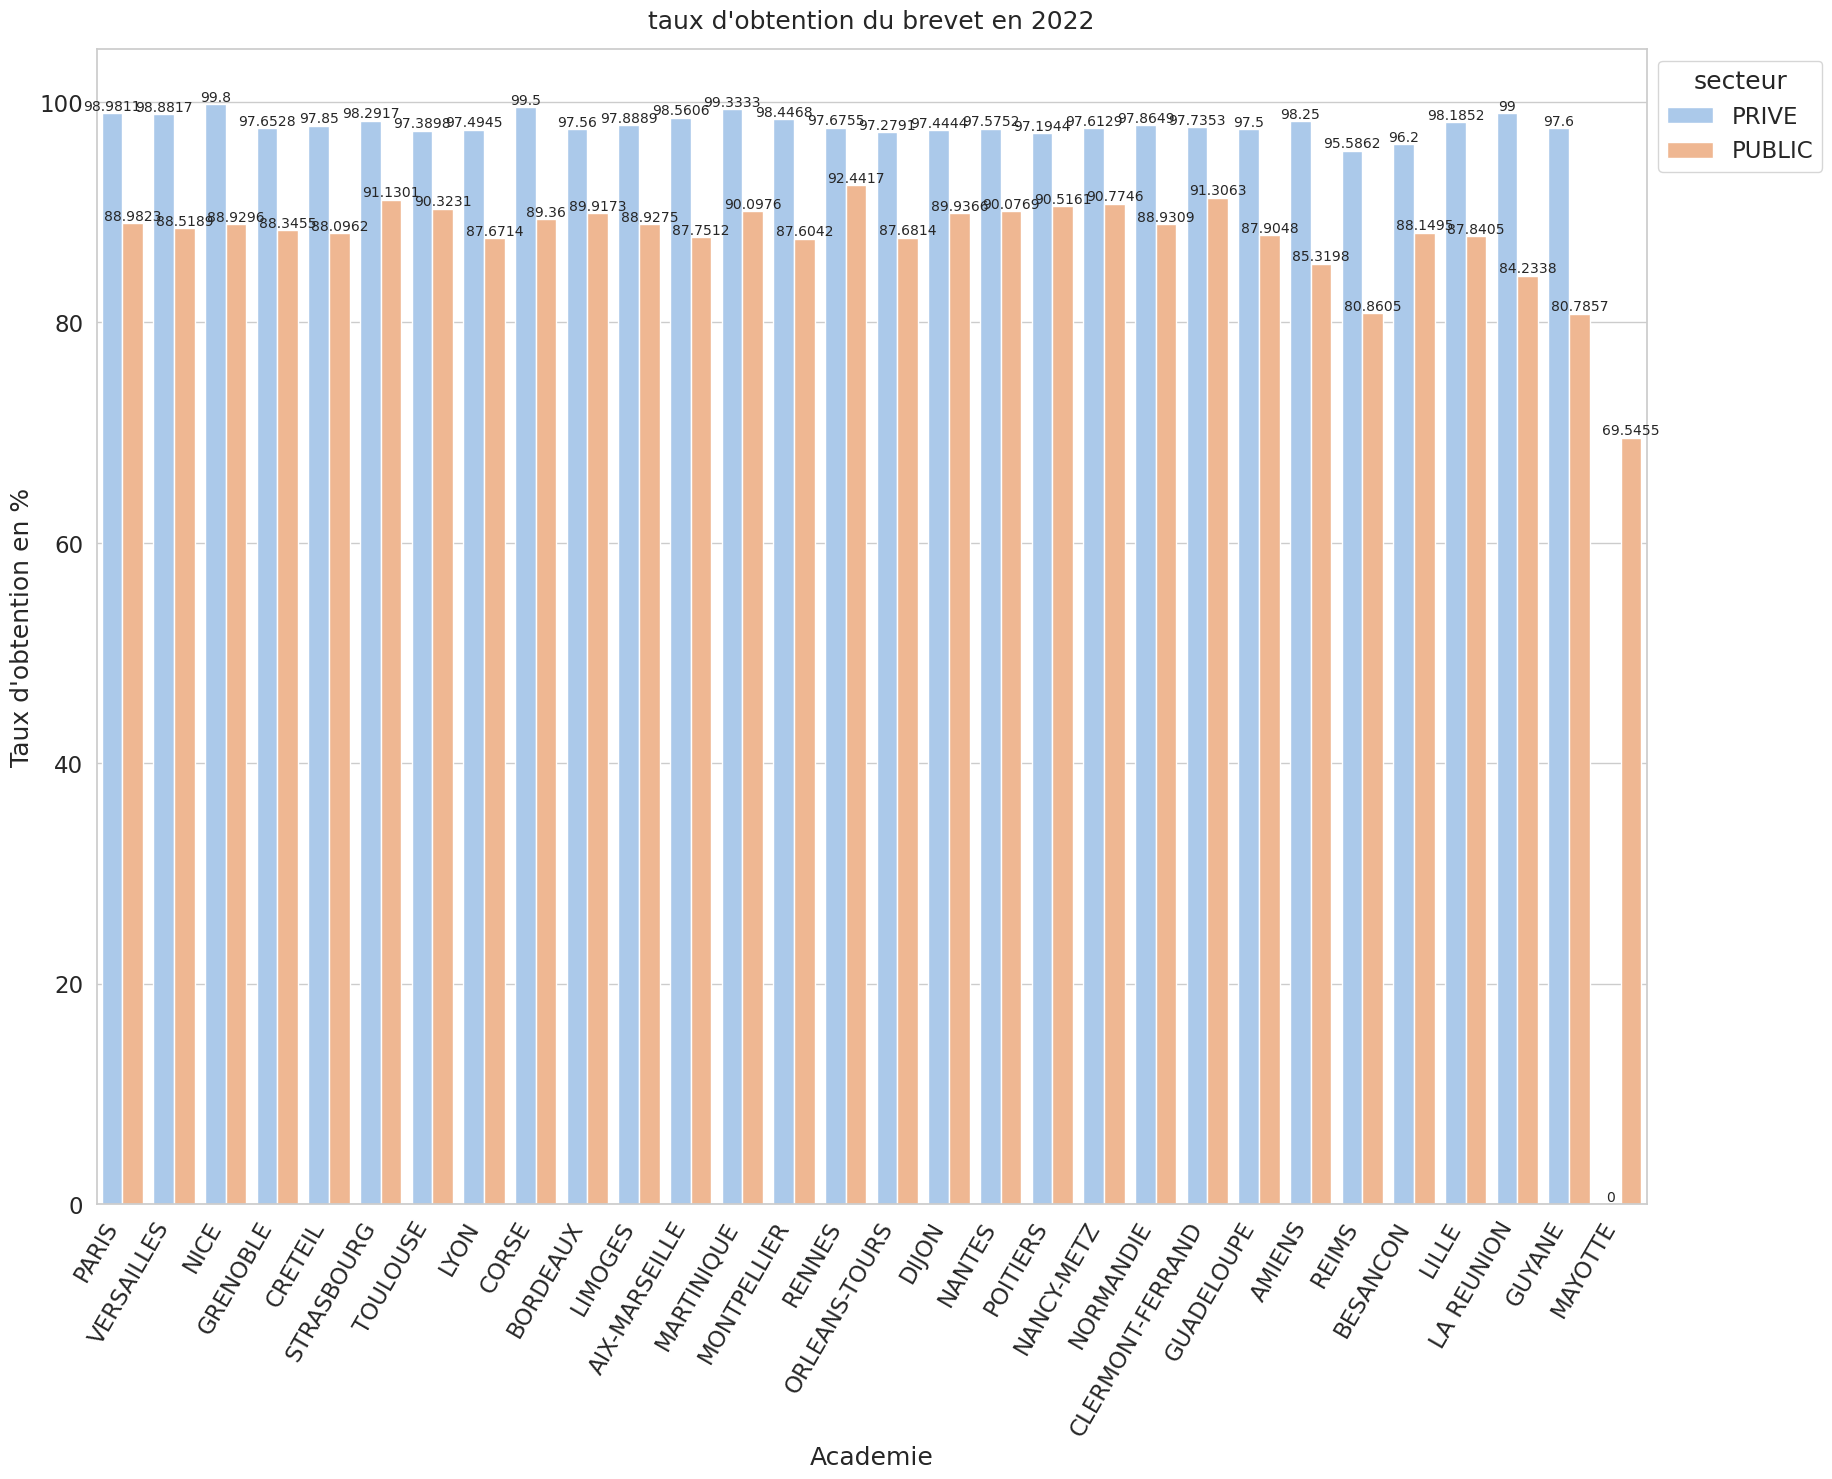

In [87]:
fig,ax = plt.subplots()
fig.set_size_inches(20,15)
sns.barplot(data=france_academie_2022, x="academie", y="taux_de_reussite_g",ax=ax,hue="secteur",estimator="sum",errorbar=None,order=rank_ips)
ax.set_title("taux d'obtention du brevet en 2022",pad=15)
ax.set_ylabel("Taux d'obtention en %")
ax.set_xlabel("Academie")
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_ylim(0)
plt.show()

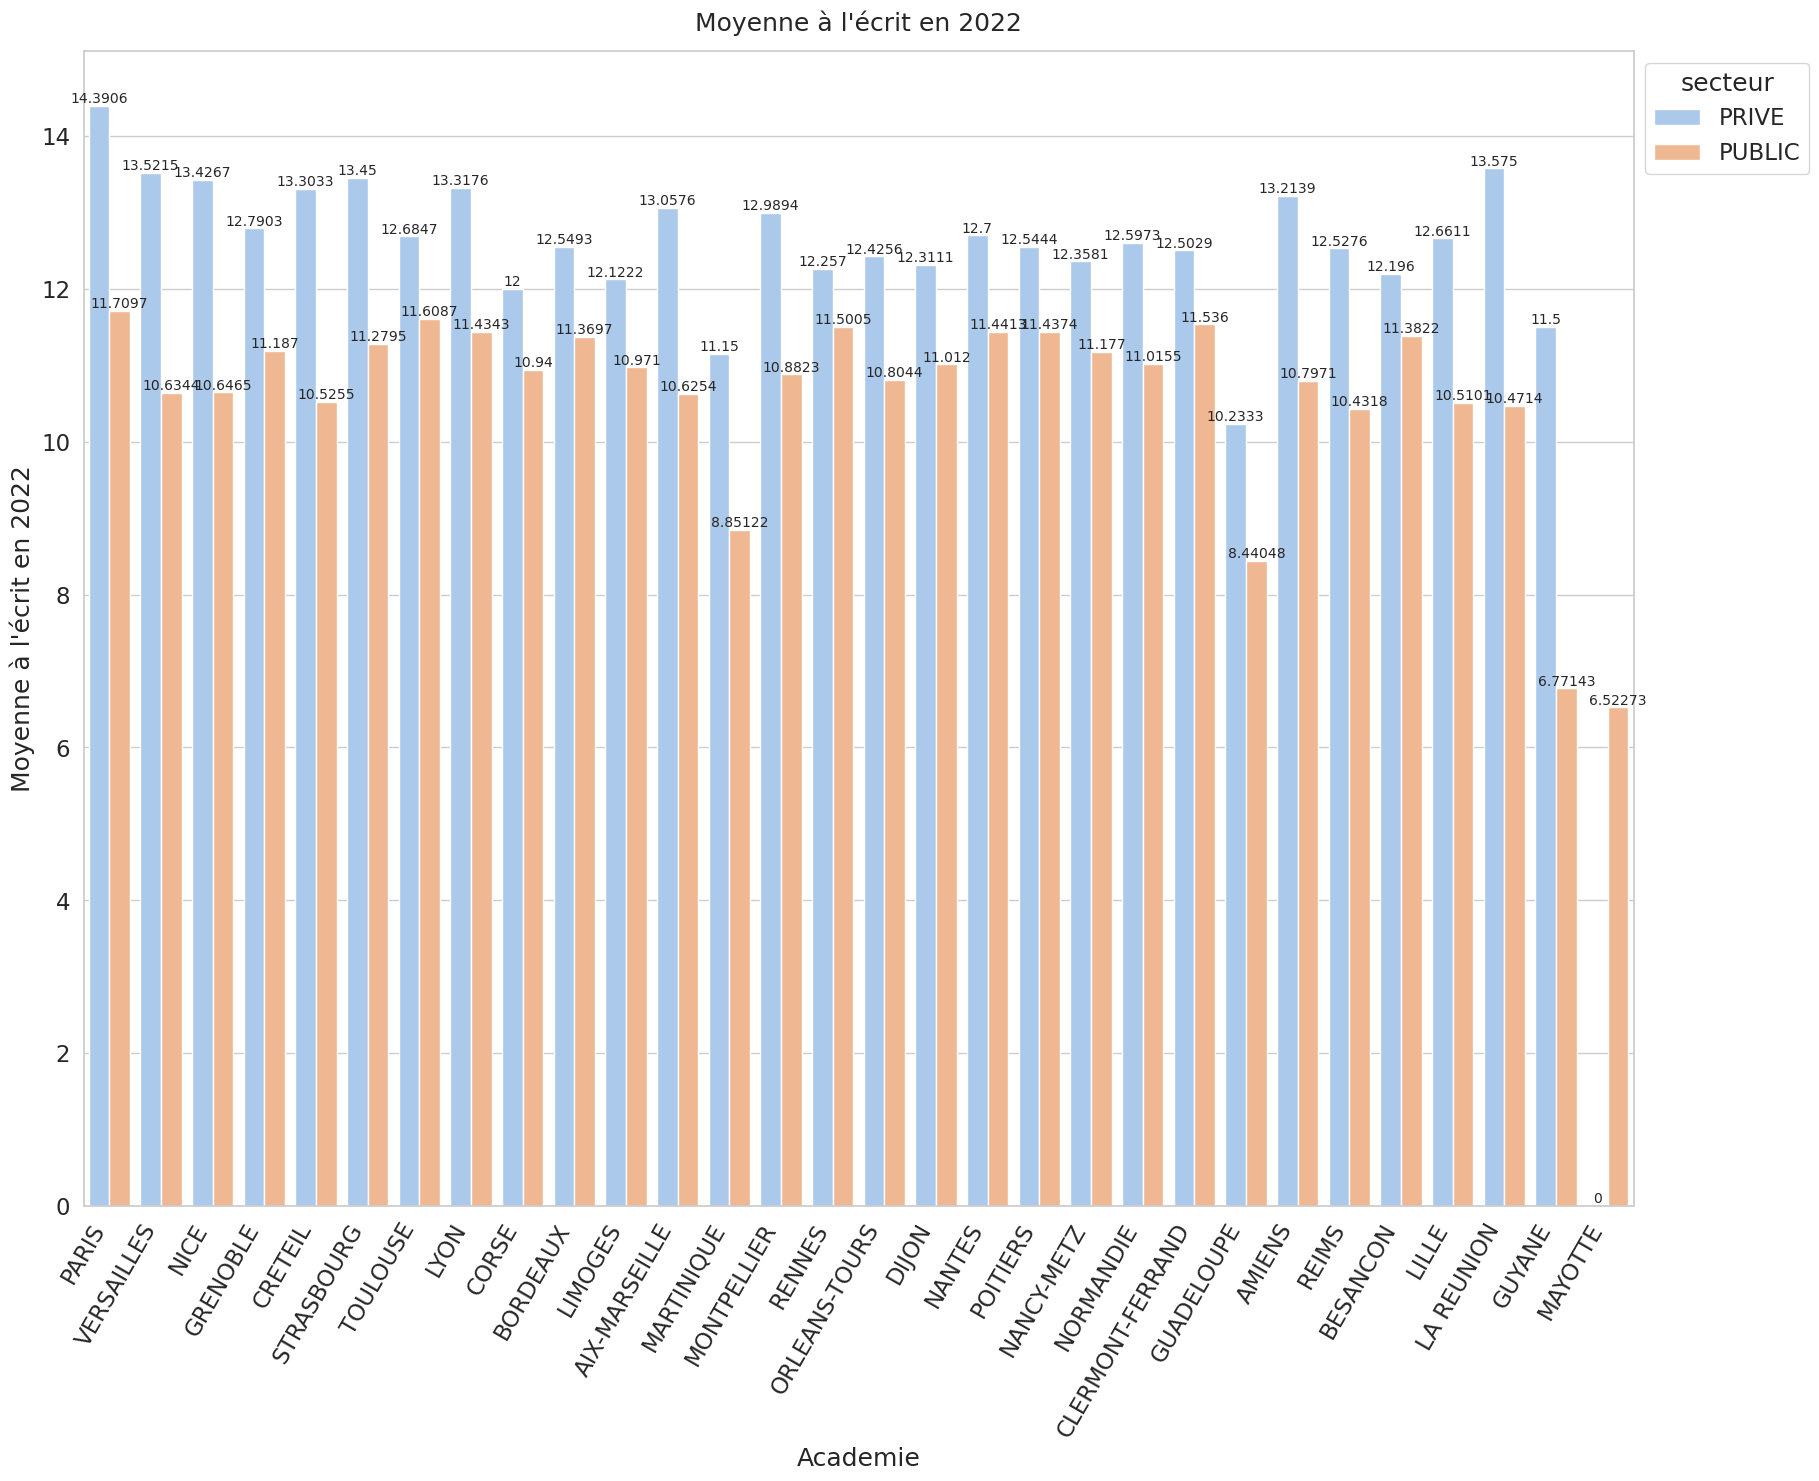

In [88]:
fig,ax = plt.subplots()
fig.set_size_inches(20,15)
sns.barplot(data=france_academie_2022, x="academie", y="note_a_l_ecrit_g",ax=ax,hue="secteur",estimator="sum",errorbar=None,order=rank_ips)
ax.set_title("Moyenne à l'écrit en 2022",pad=15)
ax.set_ylabel("Moyenne à l'écrit en 2022")
ax.set_xlabel("Academie")
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_ylim(0)
plt.show()

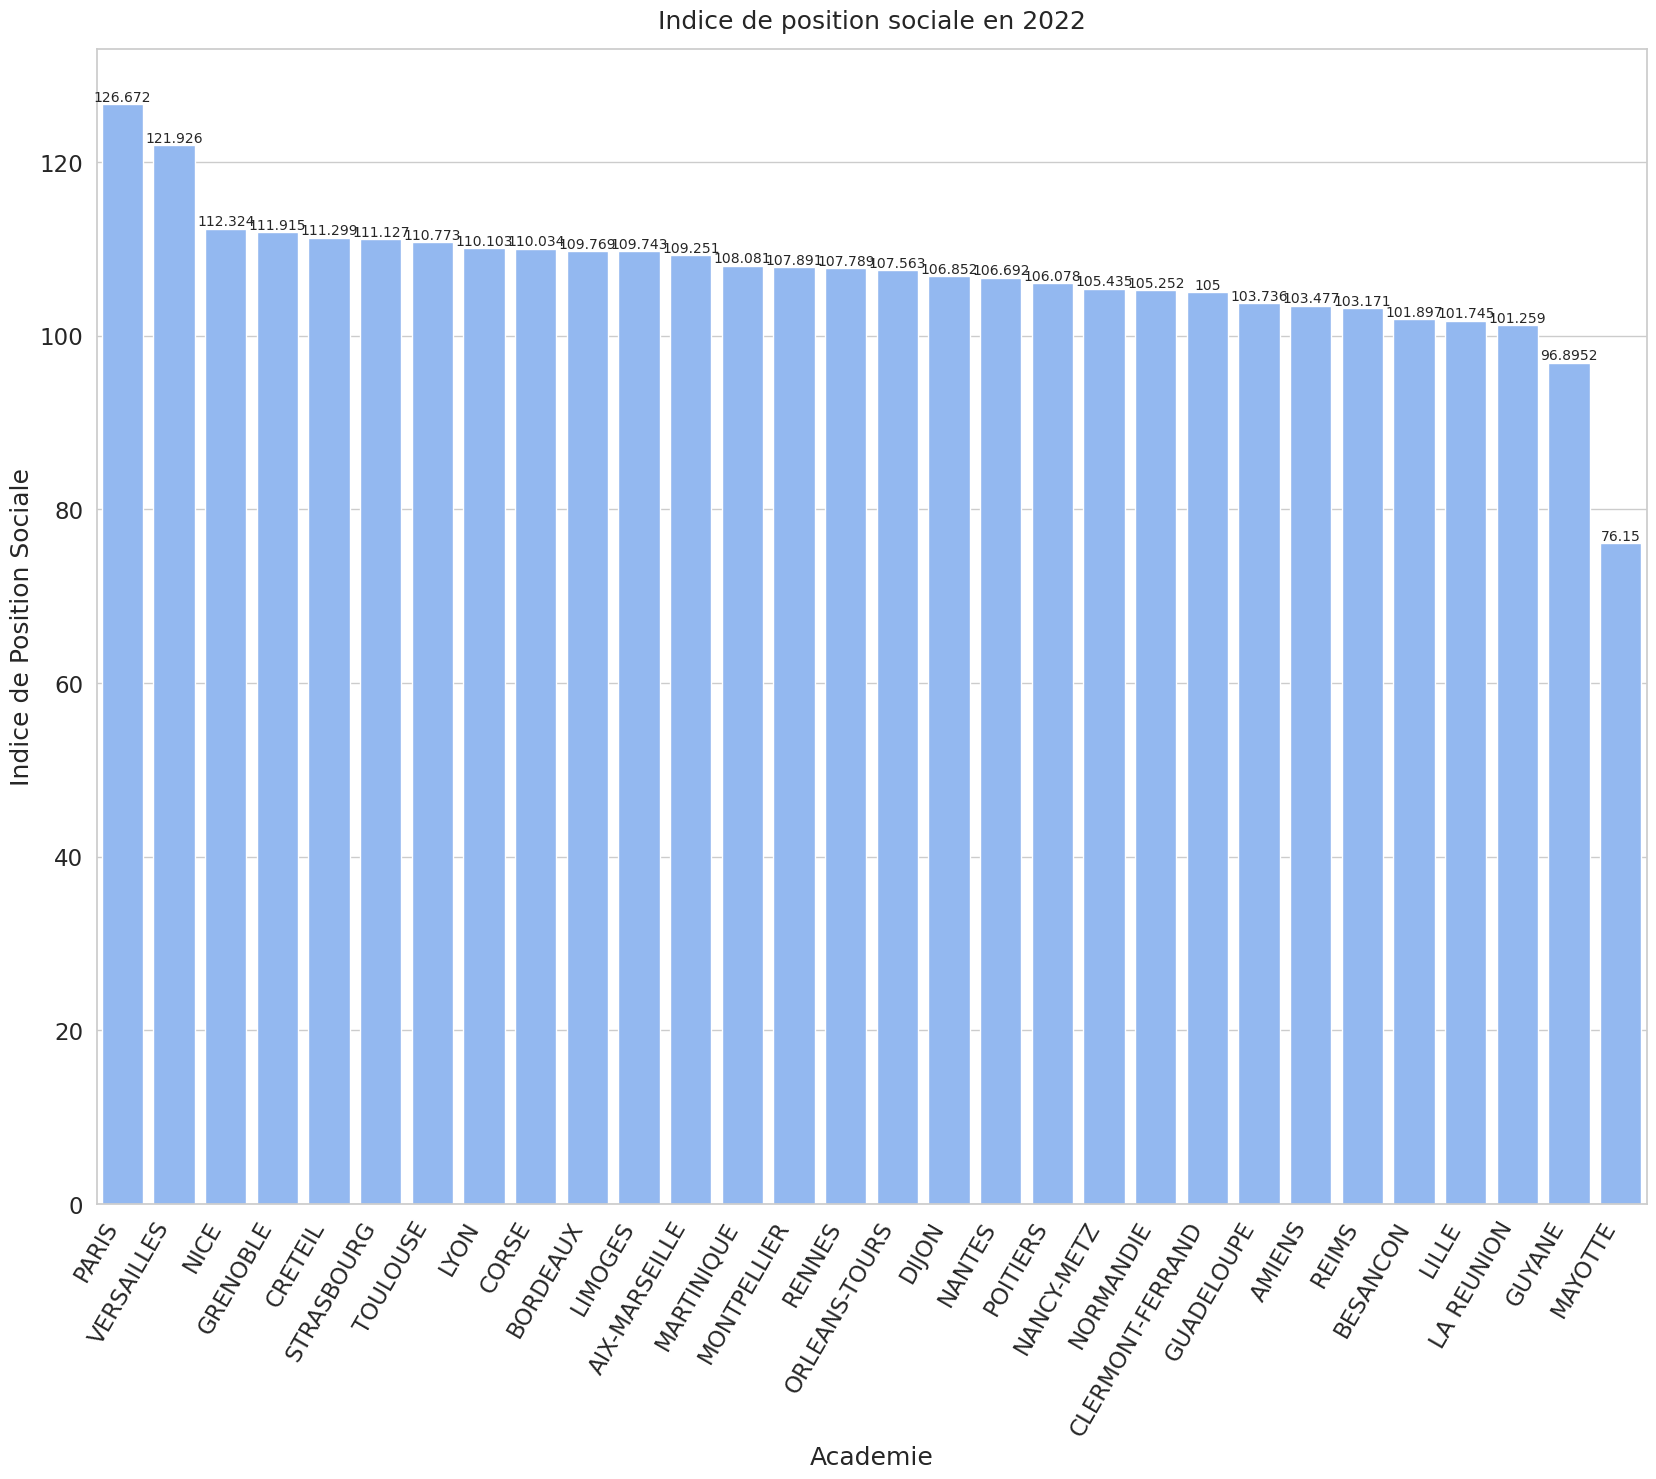

In [89]:
fig,ax = plt.subplots()
fig.set_size_inches(20,15)
sns.barplot(data=france_academie_2022, x="academie", y="ips",ax=ax,estimator="mean",errorbar=None,palette=['#83b5ff'],order=rank_ips)
ax.set_title("Indice de position sociale en 2022",pad=15)
ax.set_ylabel("Indice de Position Sociale")
ax.set_xlabel("Academie")
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right')
ax.set_ylim(0)
plt.show()

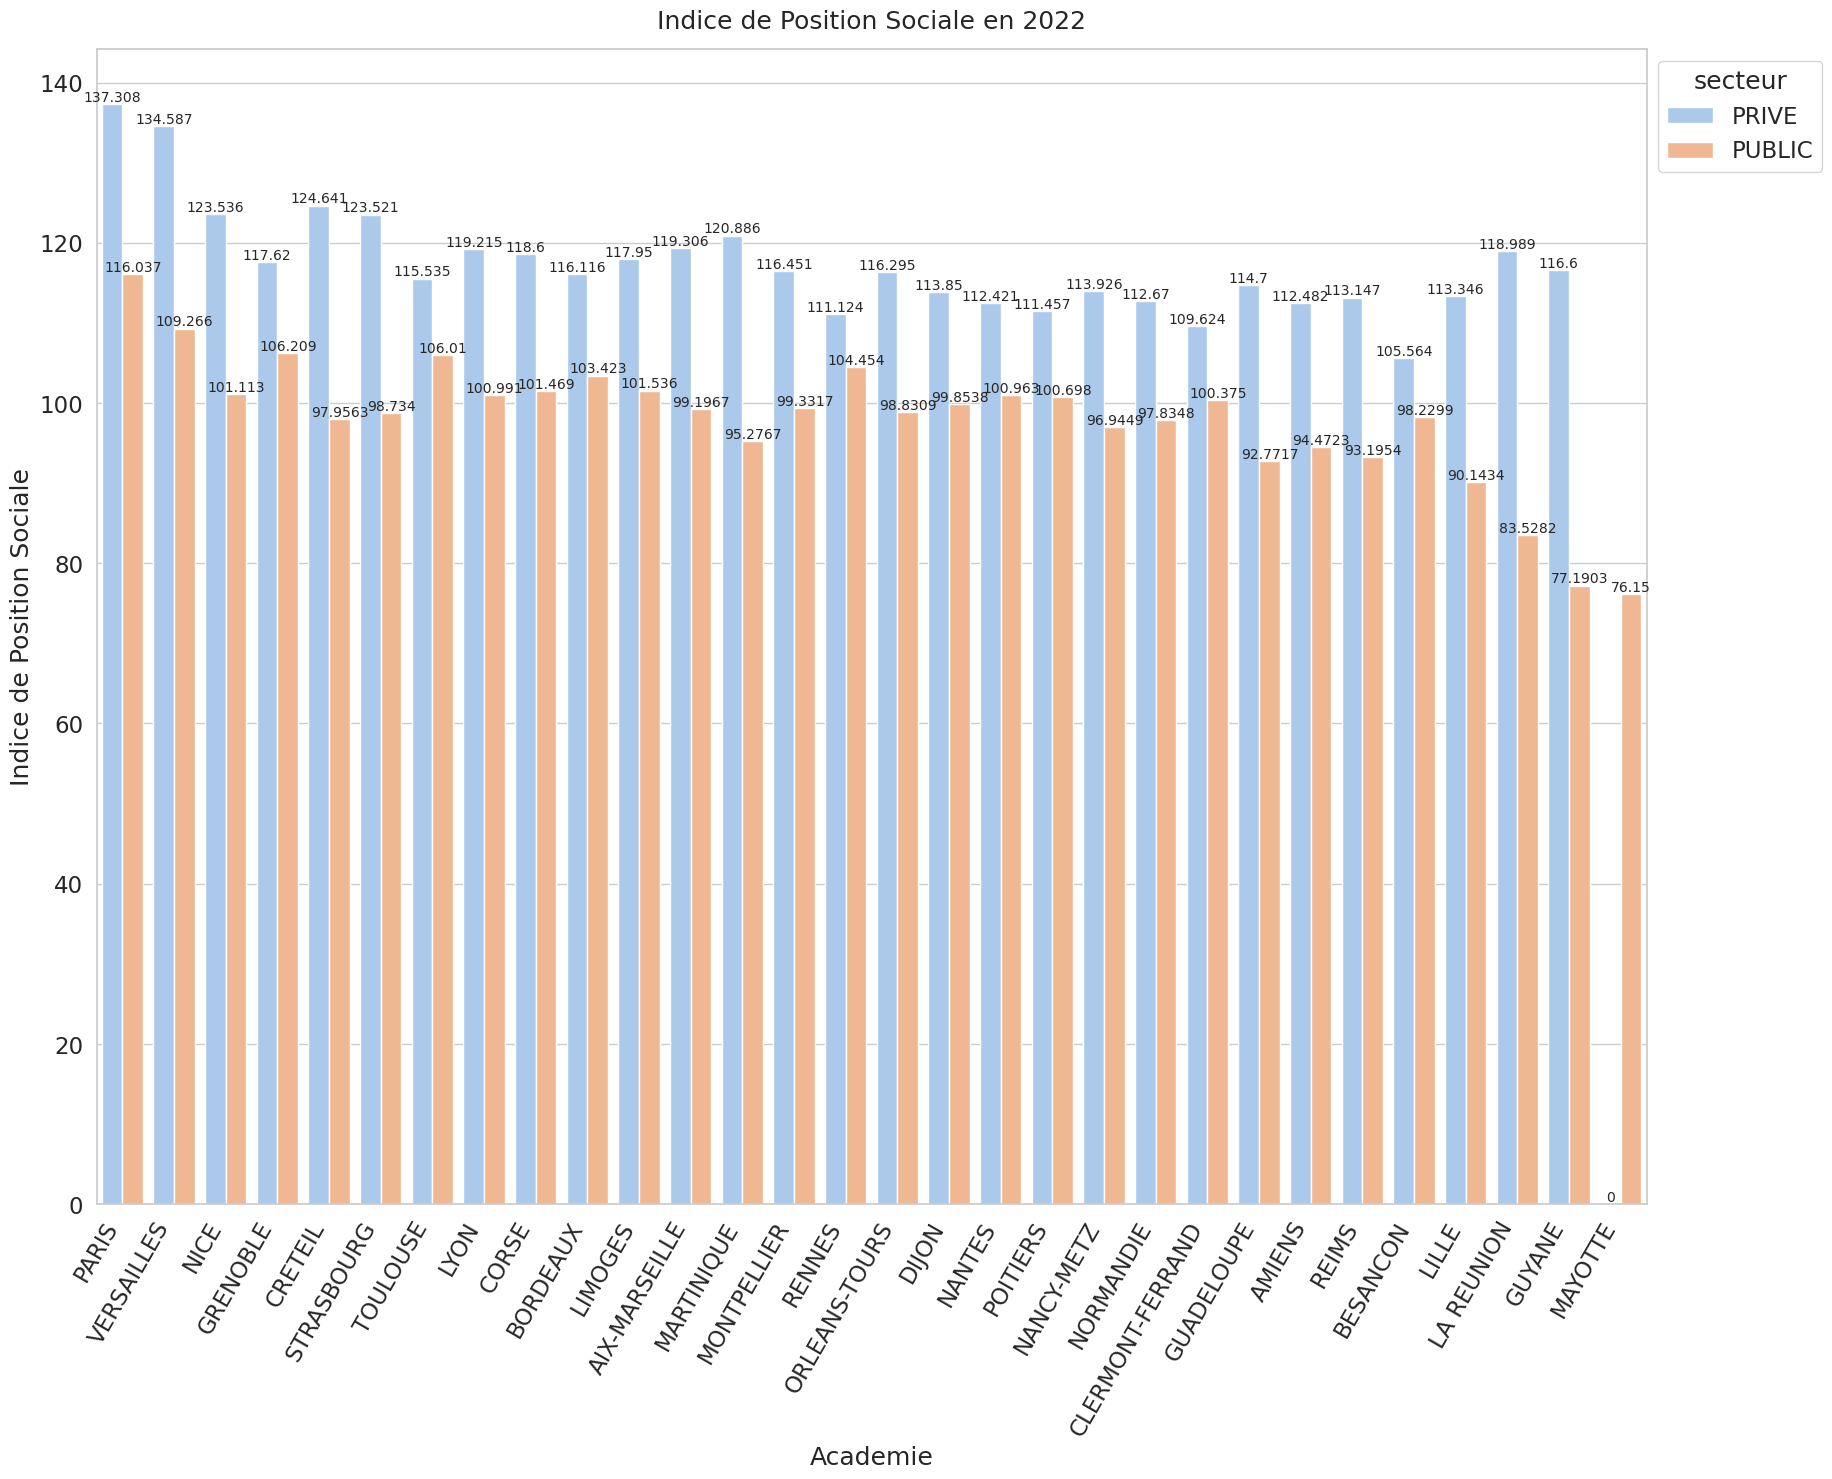

In [90]:
fig,ax = plt.subplots()
fig.set_size_inches(20,15)
sns.barplot(data=france_academie_2022, x="academie", y="ips",ax=ax,hue="secteur",estimator="sum",errorbar=None,order=rank_ips)
ax.set_title("Indice de Position Sociale en 2022",pad=15)
ax.set_ylabel("Indice de Position Sociale")
ax.set_xlabel("Academie")
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_ylim(0)
plt.show()

Sur ce barplot :<br>
Les DOMTOM ont une population sociale en public en dessous de la moyenne. Alors qu'en privée, l'IPS augmente pour arriver à des valeurs hautes.<br>
Cet écart se retrouve aussi dans d 'autre region comme Lille.<br>
La ville de Paris et Versaille se caracterise par une valeur d'IPS haute.<br>

In [91]:
del france_academie,france_academie_2022_gen,france_academie_2022

In [92]:
# recharger le dataframe
fichier_college = pd.read_csv('donnee_temp/college.csv',dtype={'code_insee_de_la_commune': str,
                                                                'part_presents_3eme_ordinaire_g' : str,
                                                                'part_presents_3eme_ordinaire_p': str,
                                                                'part_presents_3eme_segpa_total' : str})

In [93]:
fichier_college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32984 entries, 0 to 32983
Data columns (total 61 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   rentree_scolaire                          32984 non-null  int64  
 1   region_academique                         32982 non-null  object 
 2   academie                                  32982 non-null  object 
 3   departement                               32982 non-null  object 
 4   commune                                   32982 non-null  object 
 5   uai                                       32984 non-null  object 
 6   denomination_principale                   32982 non-null  object 
 7   patronyme                                 32927 non-null  object 
 8   secteur                                   32982 non-null  object 
 9   rep                                       32982 non-null  float64
 10  rep_plus                          

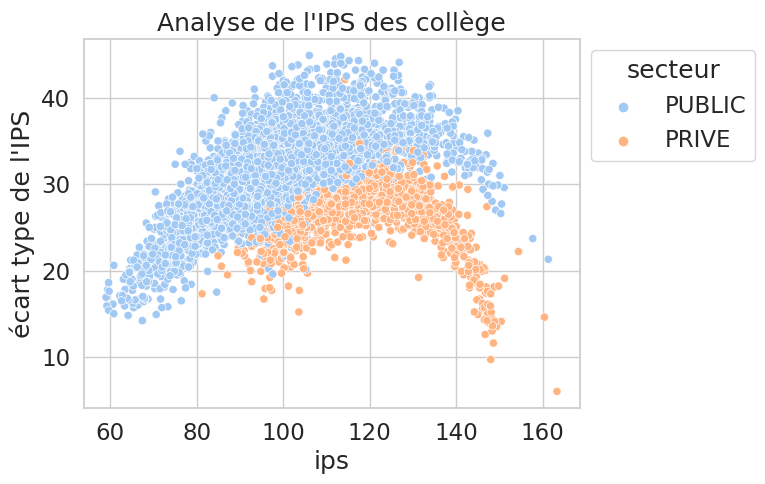

In [94]:
fig,ax = plt.subplots()
sns.scatterplot(data=fichier_college,x='ips',y='ecart_type_de_l_ips',hue='secteur',ax=ax)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_ylabel("écart type de l'IPS")
ax.set_title("Analyse de l'IPS des collège")
plt.show()

On peut apercevoir que : des colleges sont des spécialiste de la misere scolaire avec un IPS faible et un écart type faible.<br>
On peut remarquer aussi une bonne partie au milieu qui a un IPS moyen et une fort écart type.<br>
On peut aussi voir dans les IPS haut une baisse significative de l'écart type<br>

Ainsi les élèves avec de grande difficulté du à leur mileu sociaux sont groupé dans cetains collèges et les éléves avec de gros avantages sociaux sont regroupé dans d'autres collèges.<br>

# Conclusion : <br>
<br>
Les populations des colleges privés et publics ne sont pas les mêmes. Les collèges privés concentrent une certaine "élite" sociale.<br>
Les résultats des collèges privés sont donc du principalement à leur population.<br>
On peut observer une certaine ghetorisation du collège public dans certaine region, (les DOMTOM, les hauts de France, ...)<br>
On constate aussi une séparation dans les collèges privée d'une caste non ghettorisé.<br>



In [95]:
# rajout de collonne au fichier général

fichier_college['pourcentage_ulis_total'] = fichier_college['nombre_eleves_ulis']/fichier_college['nombre_eleves_total']*100
fichier_college['pourcentage_segpa_total'] = fichier_college['nombre_eleves_segpa']/fichier_college['nombre_eleves_total']*100


for classe in range(3,7,1):
    classe_total = str(classe)+"eme_total"
    classe_ulis = str(classe)+"eme_ulis"
    pourcentage_ulis = 'pourcentage_ulis_'+str(classe)+'ieme'
    fichier_college[pourcentage_ulis] = fichier_college[classe_ulis]/fichier_college[classe_total]*100

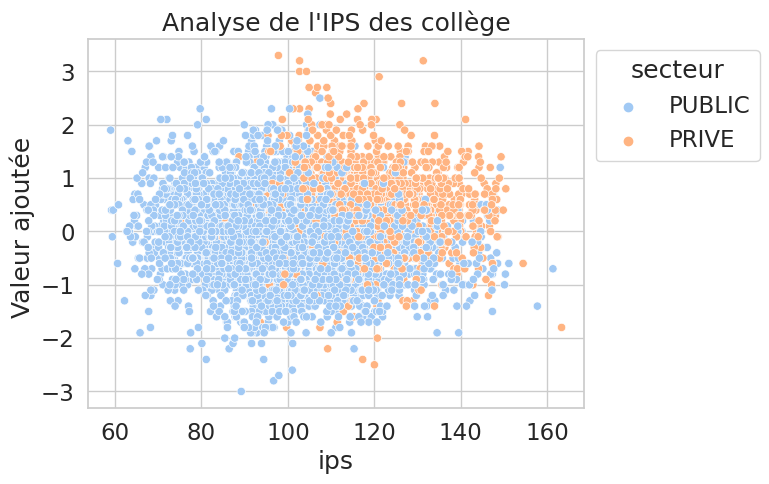

In [96]:
fig,ax = plt.subplots()
sns.scatterplot(data=fichier_college,x='ips',y='va_de_la_note_g',hue='secteur',ax=ax)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_ylabel("Valeur ajoutée ")
ax.set_title("Analyse de l'IPS des collège")
plt.show()

In [97]:
#categorisé l'IPS puis faire la moyenne de la valeur ajouté + la moyenne de l'ecart type :-D 


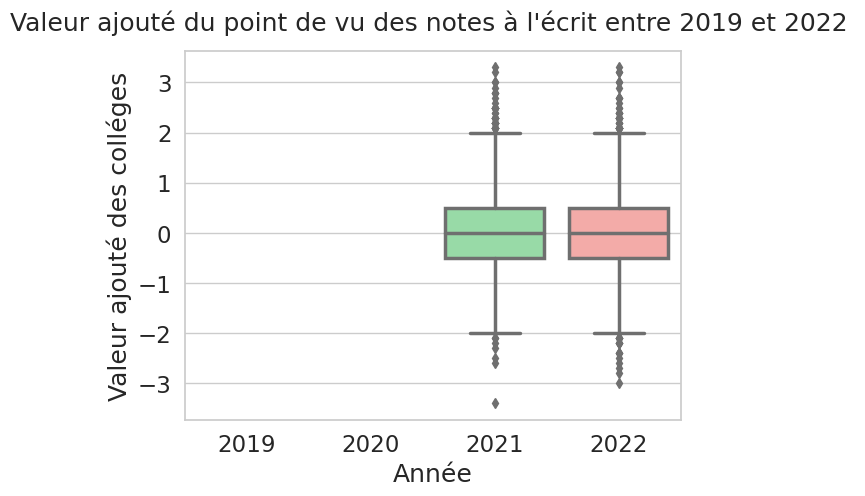

In [98]:
fig,ax = plt.subplots()
sns.boxplot(data=fichier_college, x="rentree_scolaire", y="va_de_la_note_g",ax=ax)
ax.set_title("Valeur ajouté du point de vu des notes à l'écrit entre 2019 et 2022 ",pad=15)
ax.set_ylabel("Valeur ajouté des colléges")
ax.set_xlabel("Année")
plt.show()

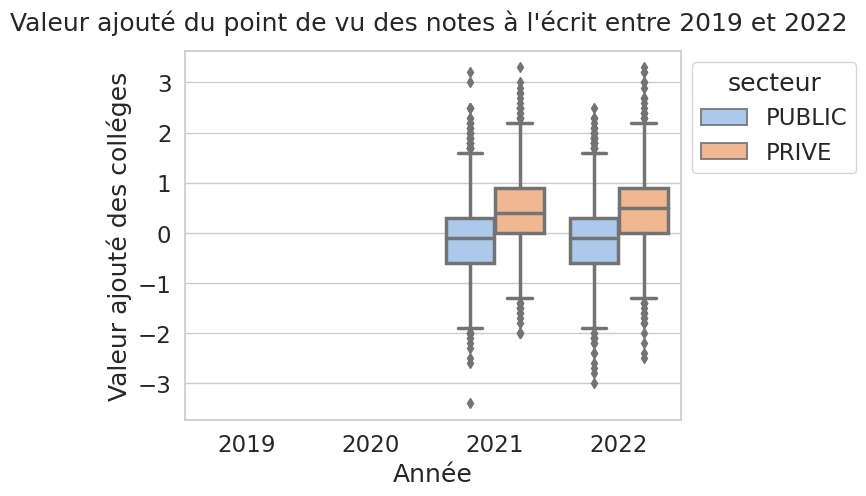

In [99]:
fig,ax = plt.subplots()
sns.boxplot(data=fichier_college, x="rentree_scolaire", y="va_de_la_note_g",ax=ax,hue="secteur")
ax.set_title("Valeur ajouté du point de vu des notes à l'écrit entre 2019 et 2022 ",pad=15)
ax.set_ylabel("Valeur ajouté des colléges")
ax.set_xlabel("Année")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

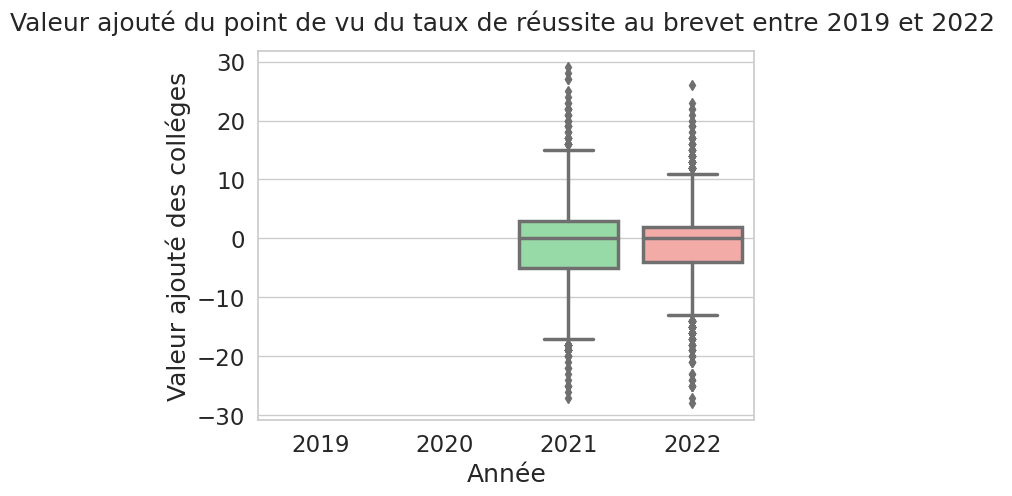

In [100]:
fig,ax = plt.subplots()
sns.boxplot(data=fichier_college, x="rentree_scolaire", y="va_du_taux_de_reussite_g",ax=ax)
ax.set_title("Valeur ajouté du point de vu du taux de réussite au brevet entre 2019 et 2022 ",pad=15)
ax.set_ylabel("Valeur ajouté des colléges")
ax.set_xlabel("Année")
plt.show()

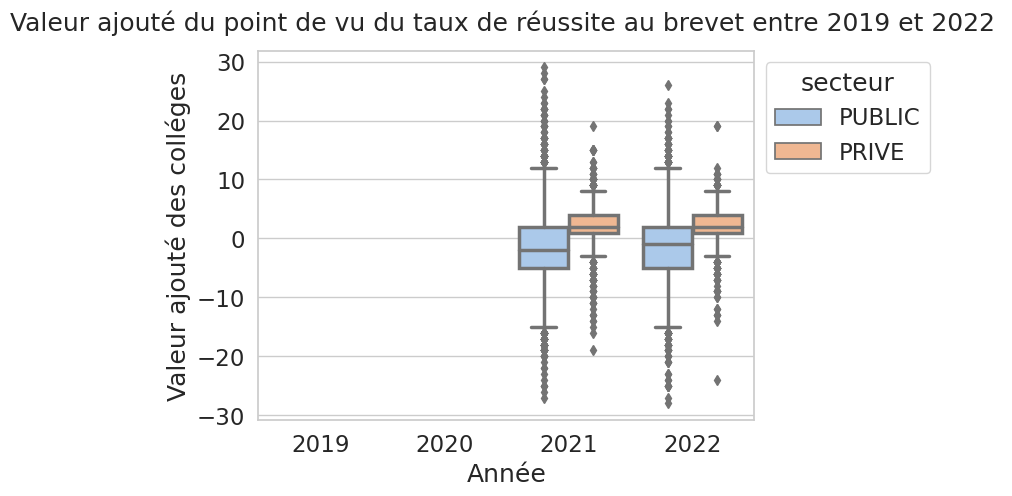

In [101]:
fig,ax = plt.subplots()
sns.boxplot(data=fichier_college, x="rentree_scolaire", y="va_du_taux_de_reussite_g",ax=ax,hue="secteur")
ax.set_title("Valeur ajouté du point de vu du taux de réussite au brevet entre 2019 et 2022 ",pad=15)
ax.set_ylabel("Valeur ajouté des colléges")
ax.set_xlabel("Année")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

Dans la notice :<br>
En moyenne, la réussite des élèves comparables en termes sociodémographiques et scolaires est très sensible à la composition sociodémographique des collèges où ils sont scolarisés (âge, origine sociale, niveau scolaire à l’entrée en sixième et sexe des élèves).<br>
<br>
Le calcul de la valeur ajoutée prends en compte ces critères selon la notice.<br>
Mais j'ai un doute car :
<ul>
<li>80 % de la note est corréllé par l'IPS.</li> 
<li>Les population des établissement privée et public ne sont pas les mêmes en termes sociaux</li>
<li>En moyenne les établissements privées resorte positivement (ils ajoutent de la valeur ajouté)</li>
</ul>
N'ayant pas accès aux calculs exact de cette valeur ajoutée, je doute de la validité et de l'impartiabilité de cet indicateur.<br>



In [102]:
fichier_college.to_csv('donnee_temp/college.csv')